# Table Of Content

- [1. Data Reading And Preprocessing](#pre)
    - [1.1 Reading The data files](#pre1)
    - [1.2 Preprocessing](#pre2)
        - [1.2.1 Duplication and Null values](#pre3)
        - [1.2.2 Missing Pattern](#pre4)
        - [1.2.3 Concatenation and Feature extraction](#pre5)
        - [1.2.4 Data Joining with Marchant Table](#pre6)
        - [1.2.5 Data Grouping And Aggregations](#pre7)
        - [1.2.6 Data joining with user score](#pre8)
        - [1.2.7 Normality And Correlation Check Using hypothesis testing](#pre9)

- [2. Modeling](#m)
    - [2.1 Simple Linear Regression](#m1)


In [2]:
# importing imporant libraries
import pandas as pd
import numpy as np
import missingno as msno

In [3]:
! pip install missingno

In [4]:
# the below codes force pandas to print all rows in the screen instead of stress them
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)

# 1. Data Reading And Preprocessing
<a id="pre"></a>

### 1.1 Reading The data files
<a id="pre1"></a>

In [5]:
historical_transactions = pd.read_csv('historical_transactions.csv') # reading historical transactions file
merchants = pd.read_csv('merchants.csv') # reading merchants file
user_score = pd.read_csv('userscore.csv') # read user_score file
new_merchant_transactions = pd.read_csv('new_merchant_transactions.csv') # read `new_merchant_transactions` file

In [6]:
user_score.shape

(201917, 6)

In [7]:
historical_transactions.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 3.0+ GB


## 1.2 Data Preprocessing
<a id="pre2"></a>

### 1.2.1 Duplication and Null values
<a id="pre3"></a>

In [9]:
historical_transactions.isna().sum().sort_values(ascending=False)

category_2              2652864
category_3               178159
merchant_id              138481
authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
merchant_category_id          0
month_lag                     0
purchase_amount               0
purchase_date                 0
state_id                      0
subsector_id                  0
dtype: int64

<Axes: >

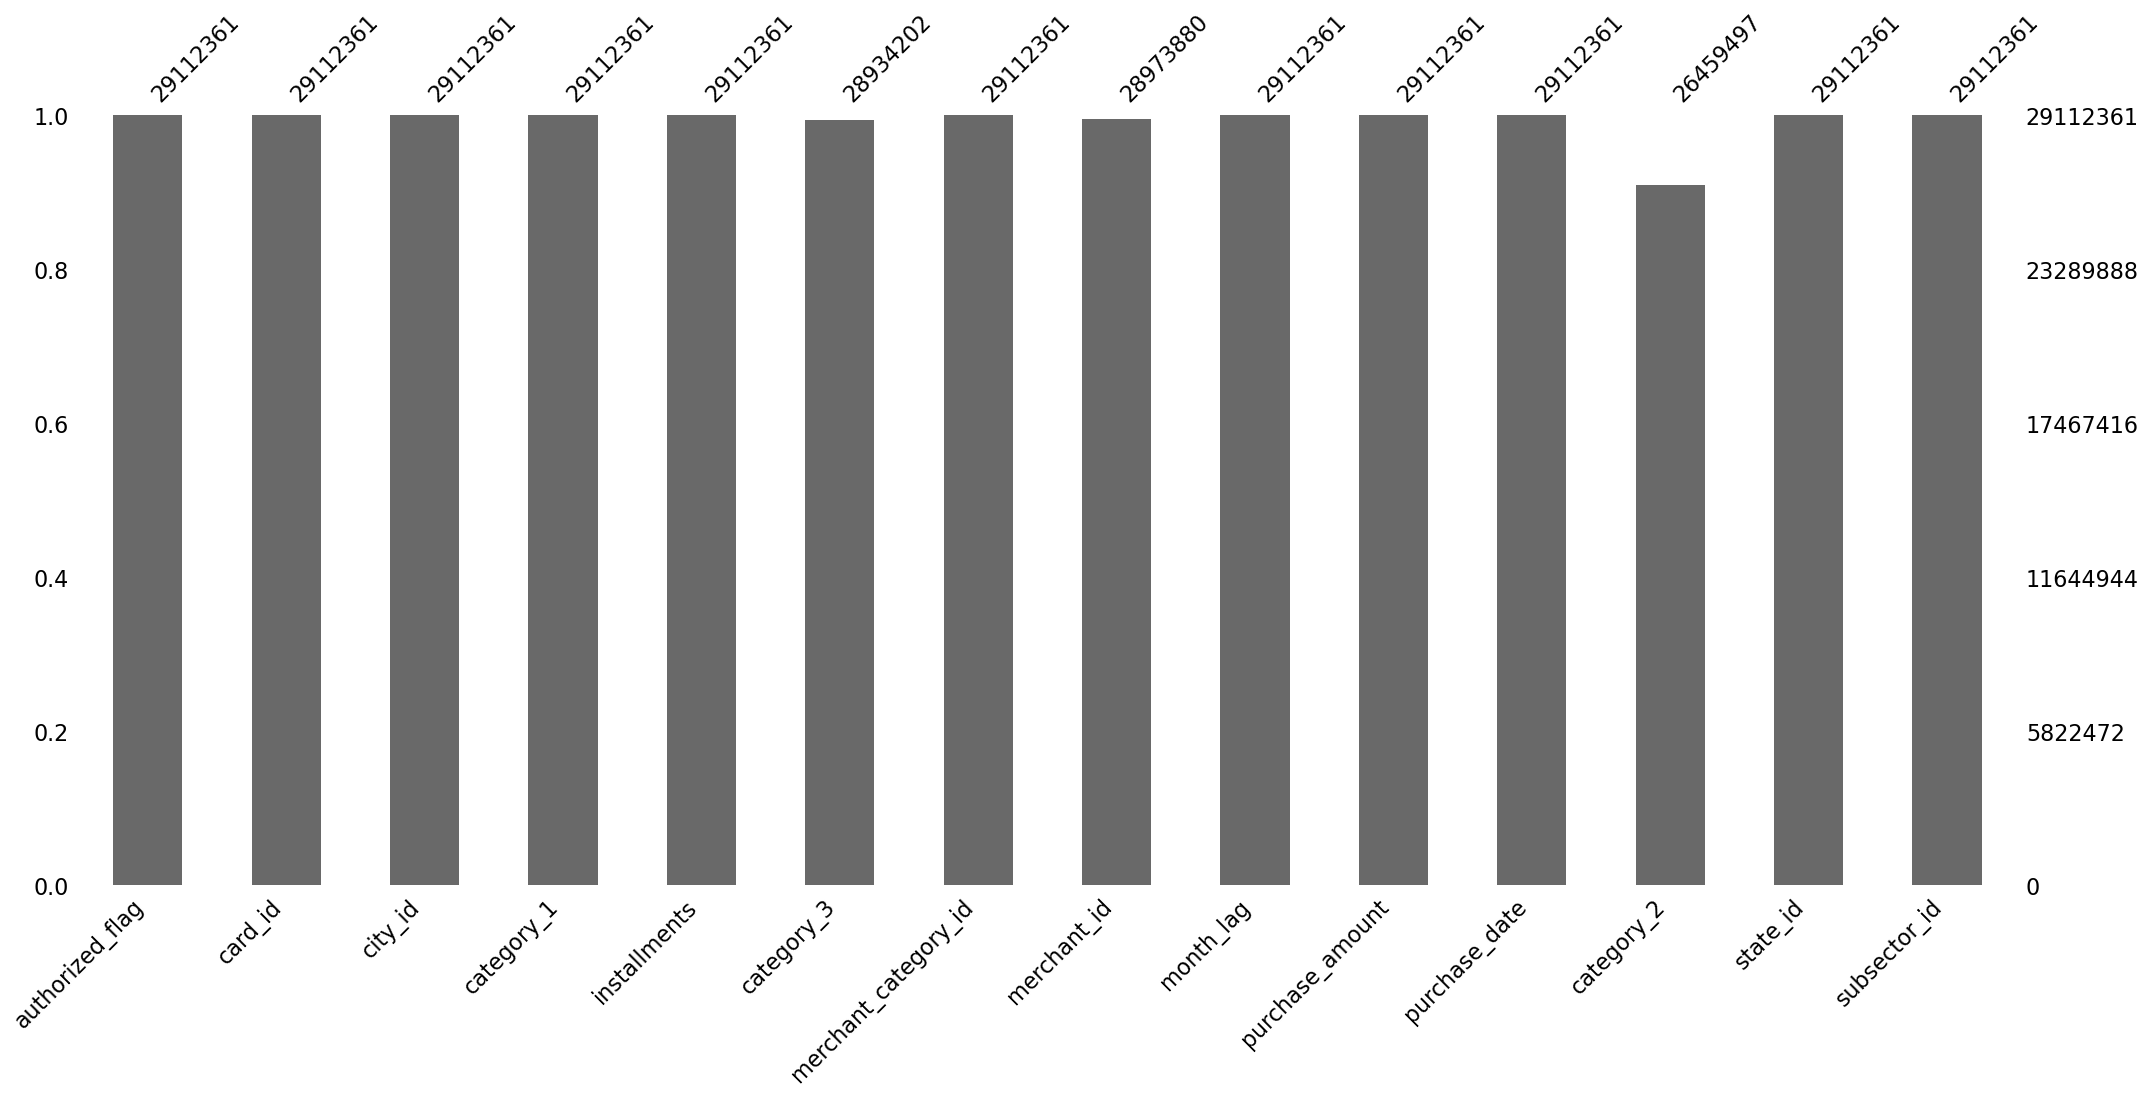

In [10]:
msno.bar(historical_transactions)

<Axes: >

/opt/conda/lib/python3.9/site-packages/matplotlib/image.py:180: UserWarning: Data with more than 2**24 rows cannot be accurately displayed. Downsampling to less than 2**24 rows before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**24 rows'))


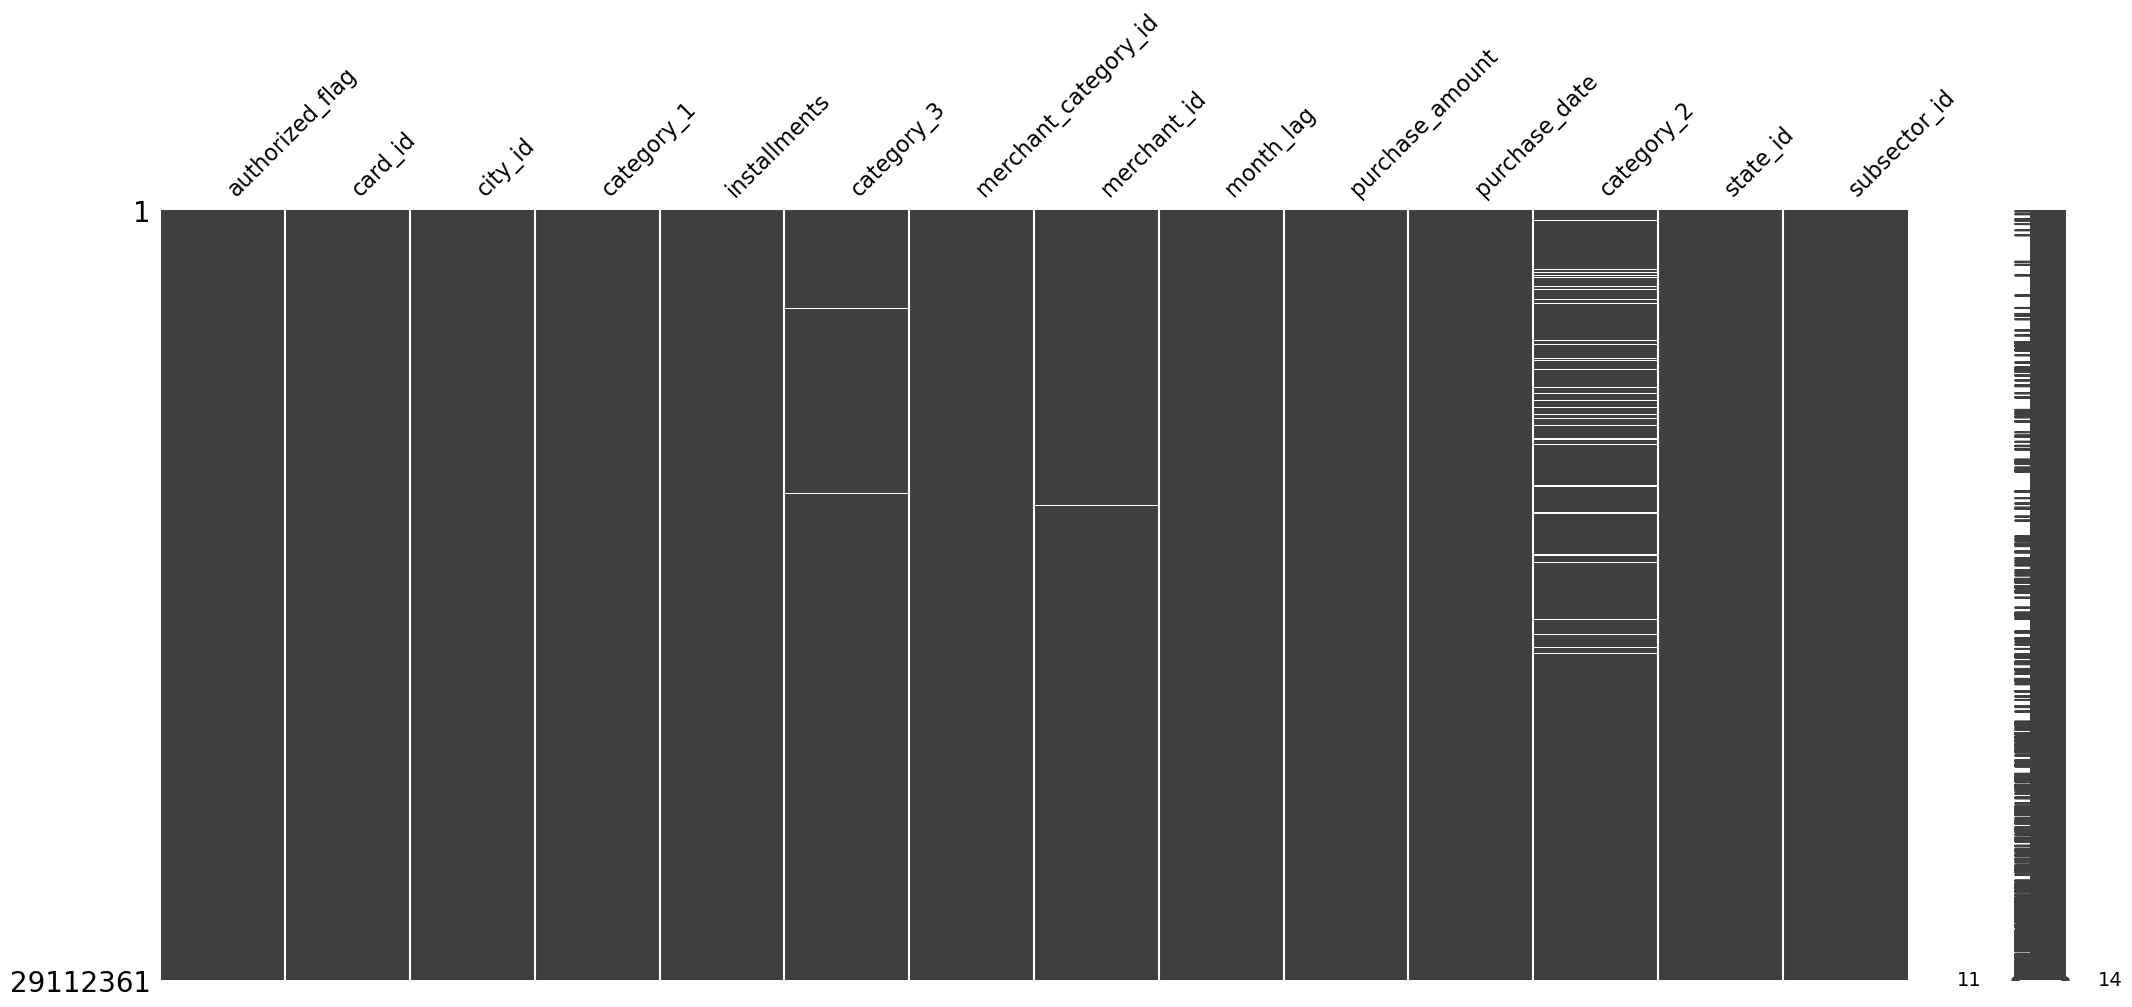

In [11]:
msno.matrix(historical_transactions)

In [12]:
merchants.isna().sum().sort_values(ascending=False)

category_2                     11887
avg_sales_lag6                    13
avg_sales_lag12                   13
avg_sales_lag3                    13
state_id                           0
city_id                            0
category_4                         0
active_months_lag12                0
avg_purchases_lag12                0
active_months_lag6                 0
avg_purchases_lag6                 0
merchant_id                        0
merchant_group_id                  0
avg_purchases_lag3                 0
most_recent_purchases_range        0
most_recent_sales_range            0
category_1                         0
numerical_2                        0
numerical_1                        0
subsector_id                       0
merchant_category_id               0
active_months_lag3                 0
dtype: int64

<Axes: >

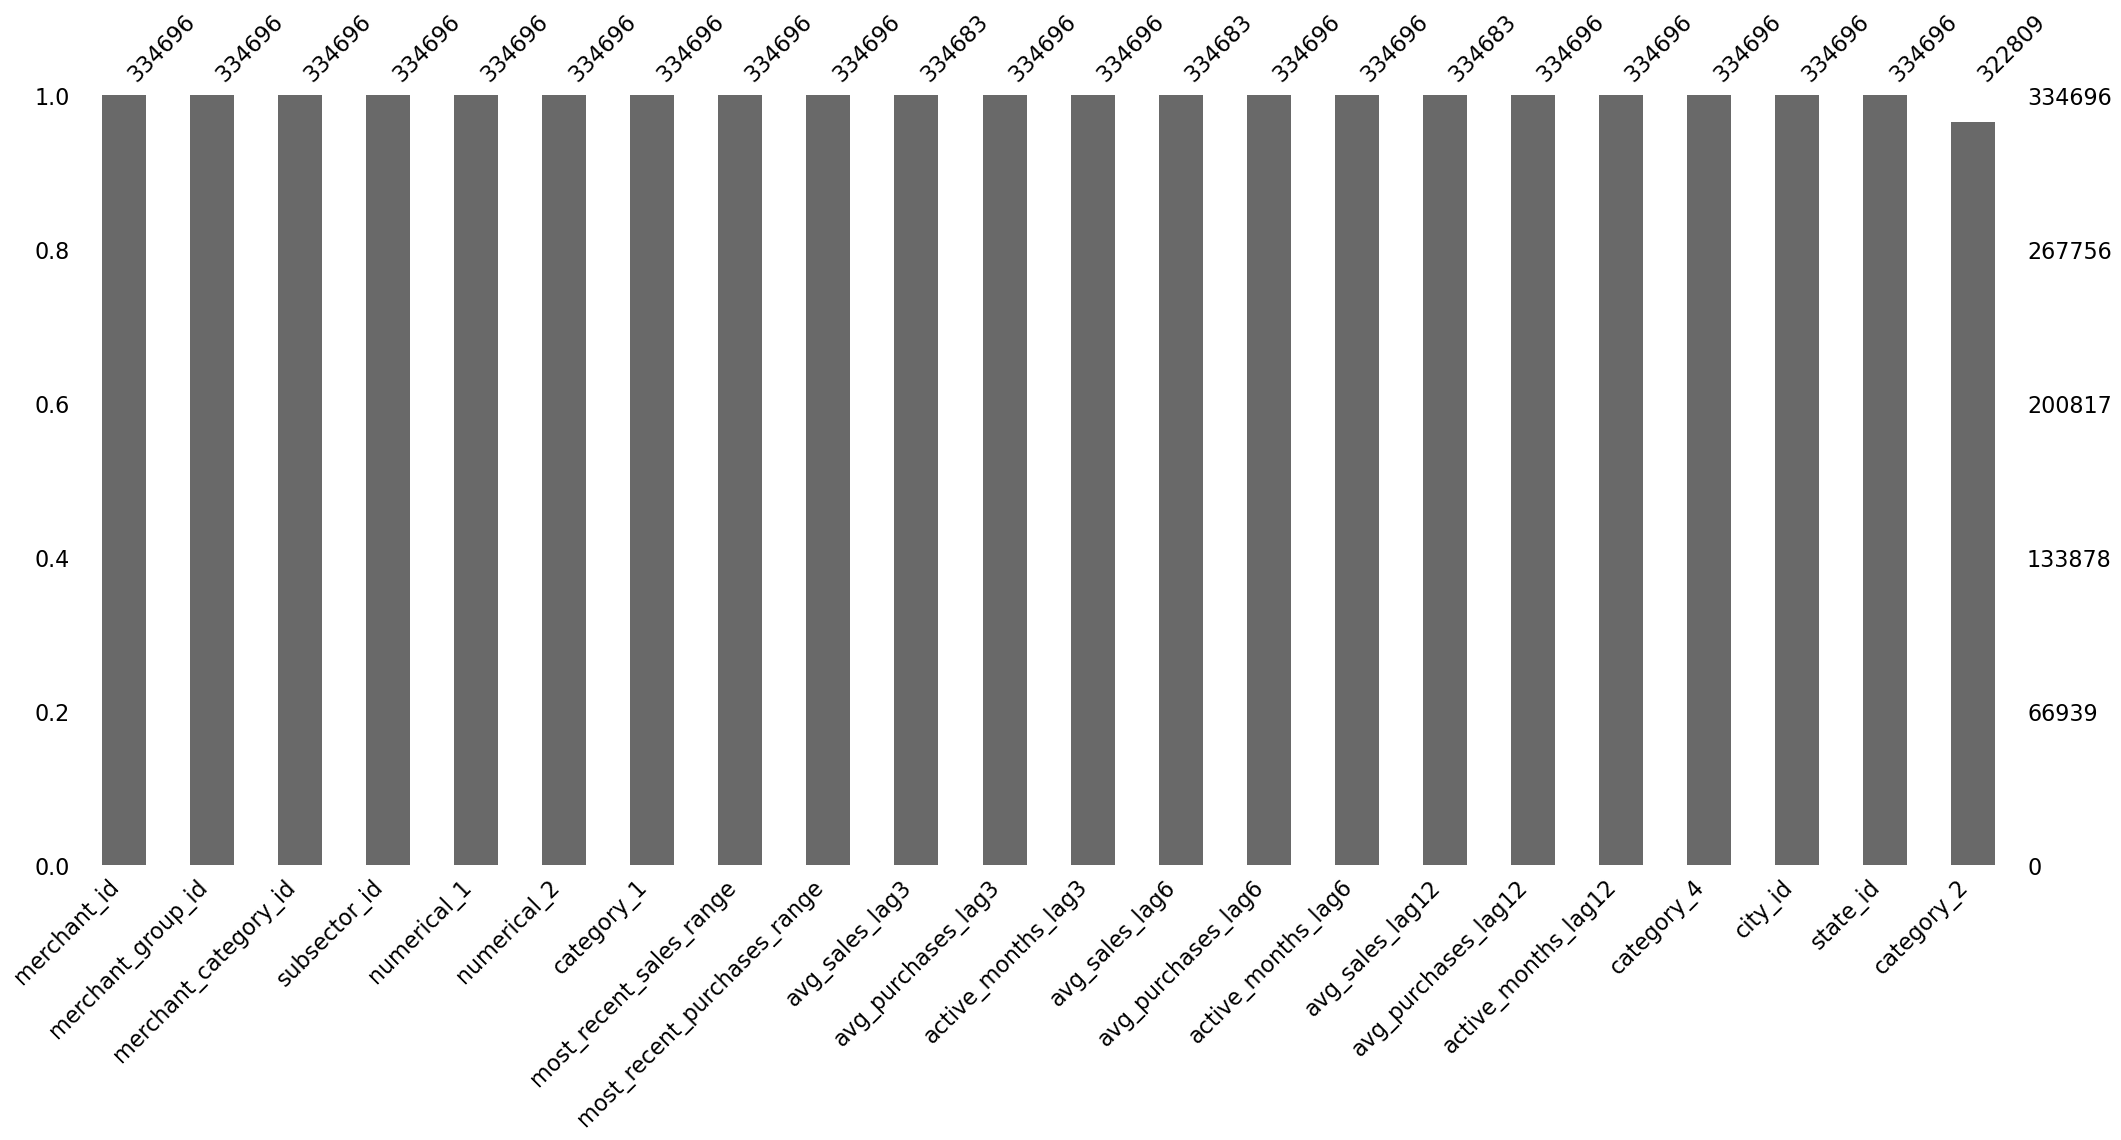

In [13]:
msno.bar(merchants)

<Axes: >

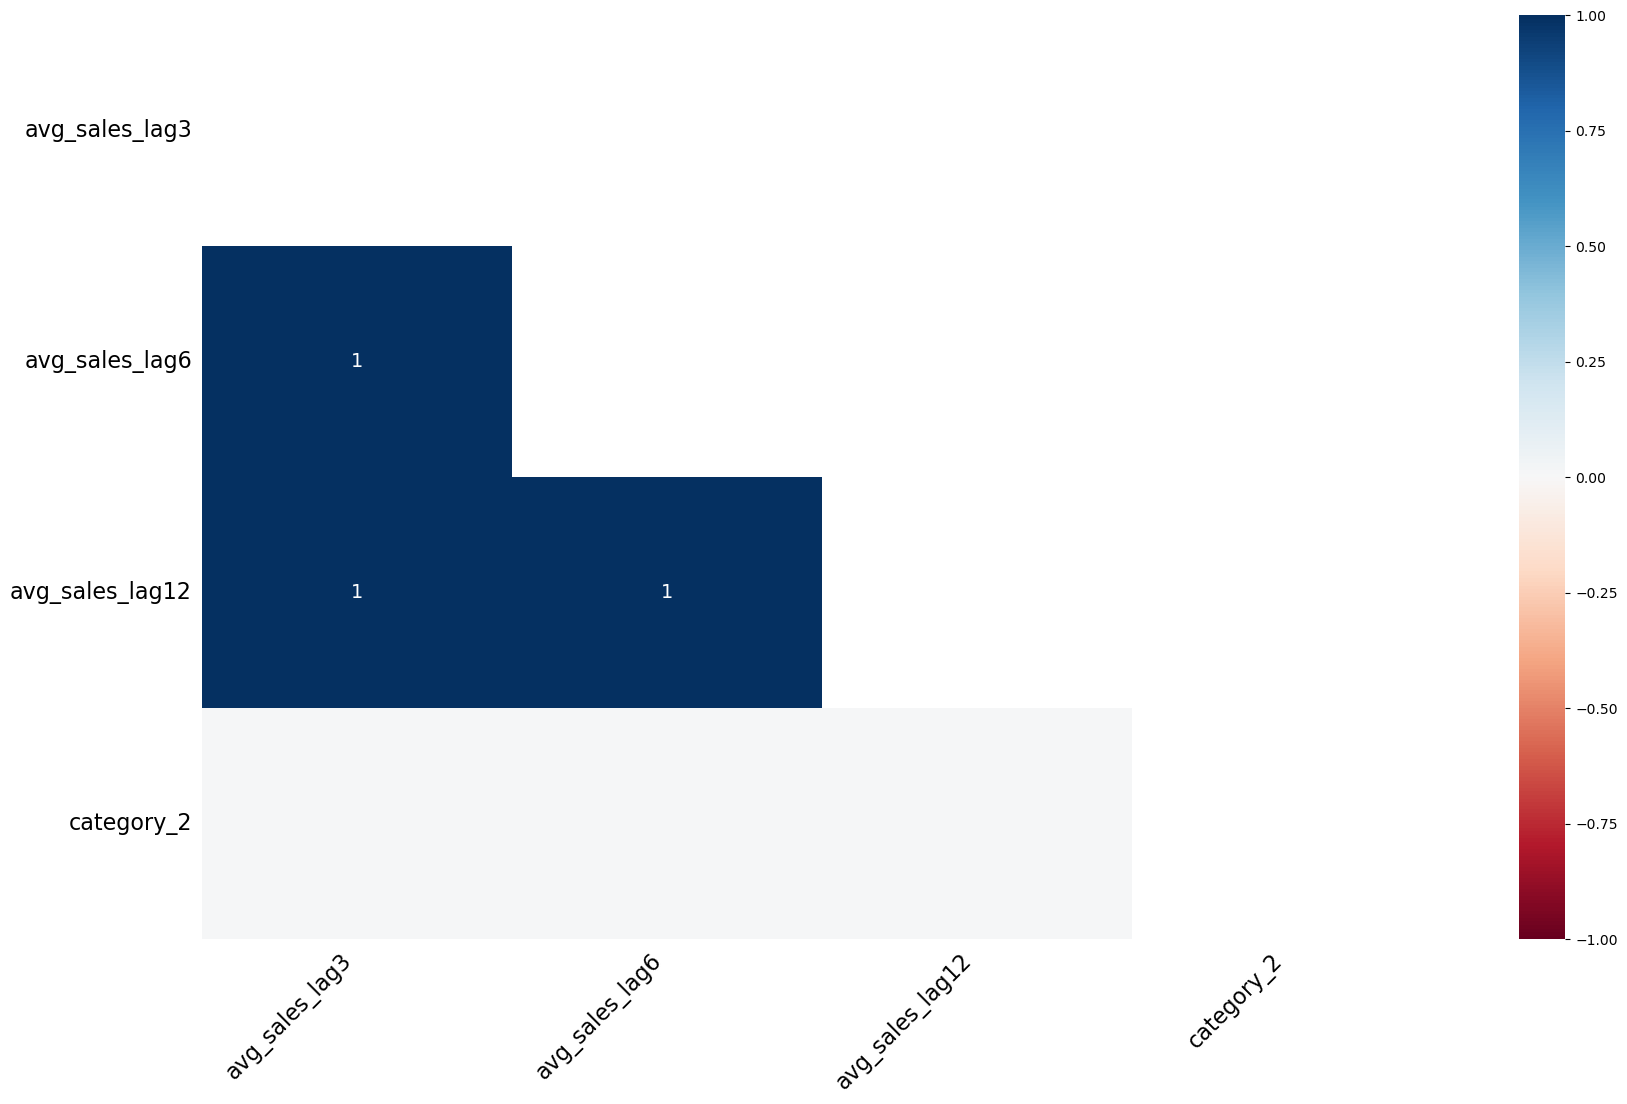

In [14]:
msno.heatmap(merchants[merchants.columns[merchants.isnull().any()].tolist()])

<Axes: >

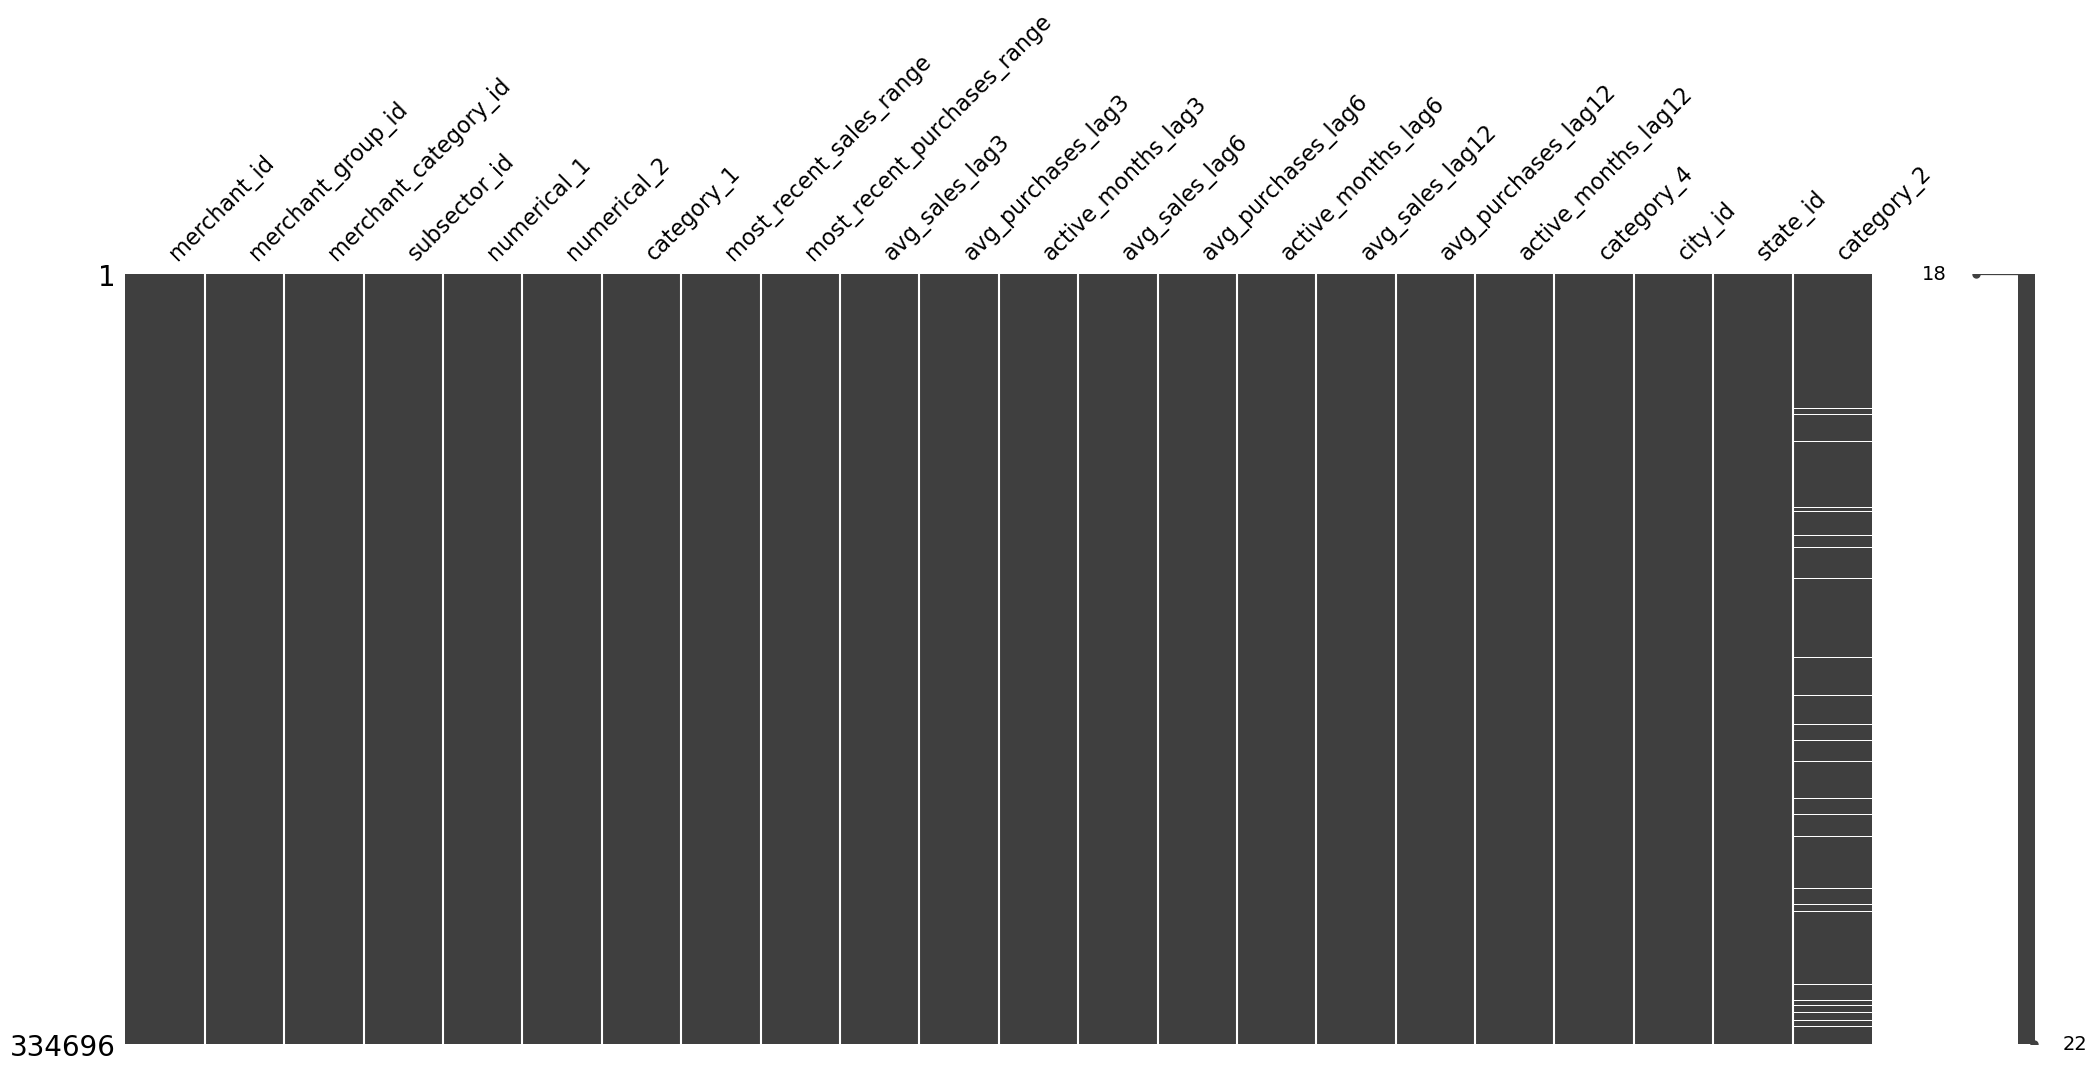

In [15]:
msno.matrix(merchants)

In [16]:
user_score.isna().sum().sort_values(ascending=False)

card_id               0
first_active_month    0
feature_1             0
feature_2             0
feature_3             0
score                 0
dtype: int64

<Axes: >

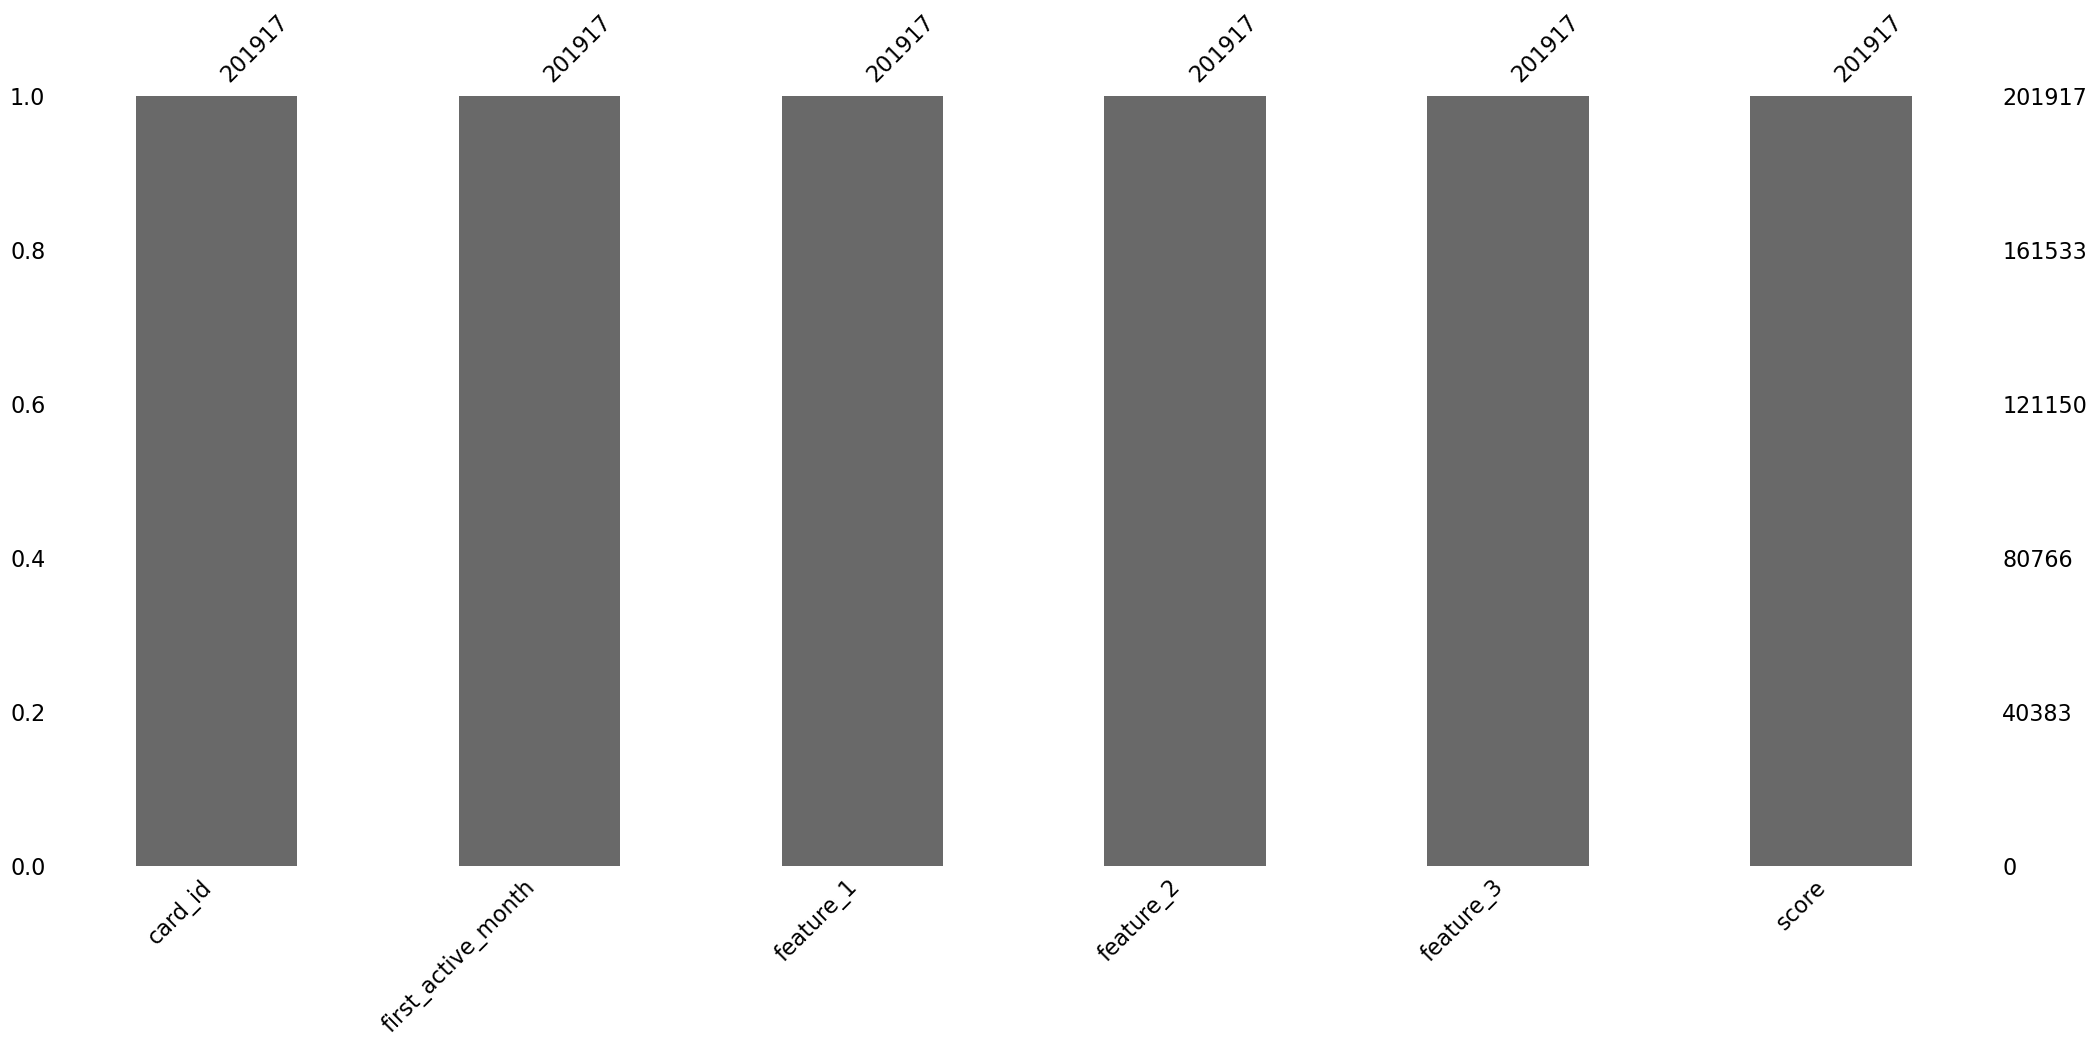

In [17]:
msno.bar(user_score)

In [18]:
new_merchant_transactions.isna().sum().sort_values(ascending=False)

category_2              111745
category_3               55922
merchant_id              26216
authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
merchant_category_id         0
month_lag                    0
purchase_amount              0
purchase_date                0
state_id                     0
subsector_id                 0
dtype: int64

<Axes: >

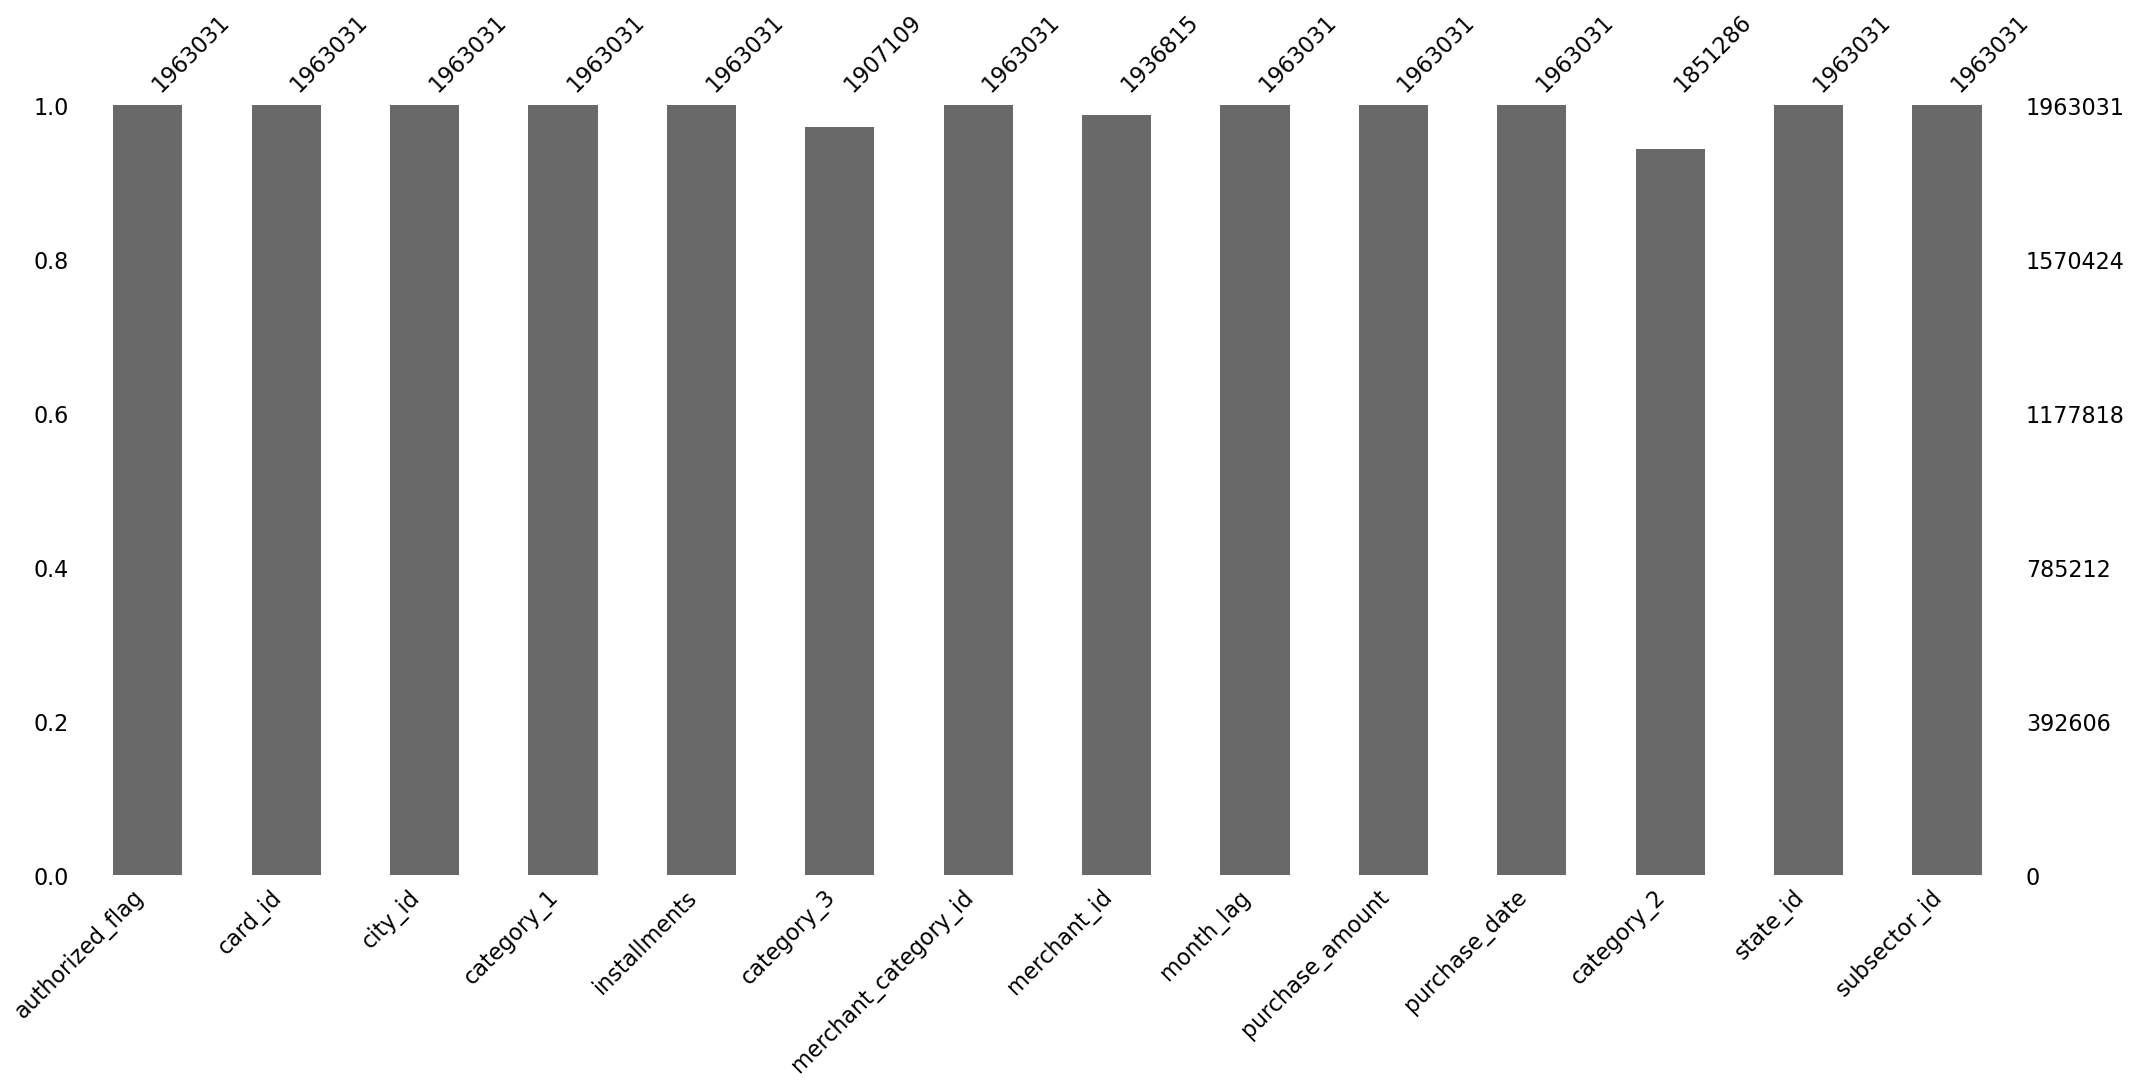

In [19]:
msno.bar(new_merchant_transactions)

<Axes: >

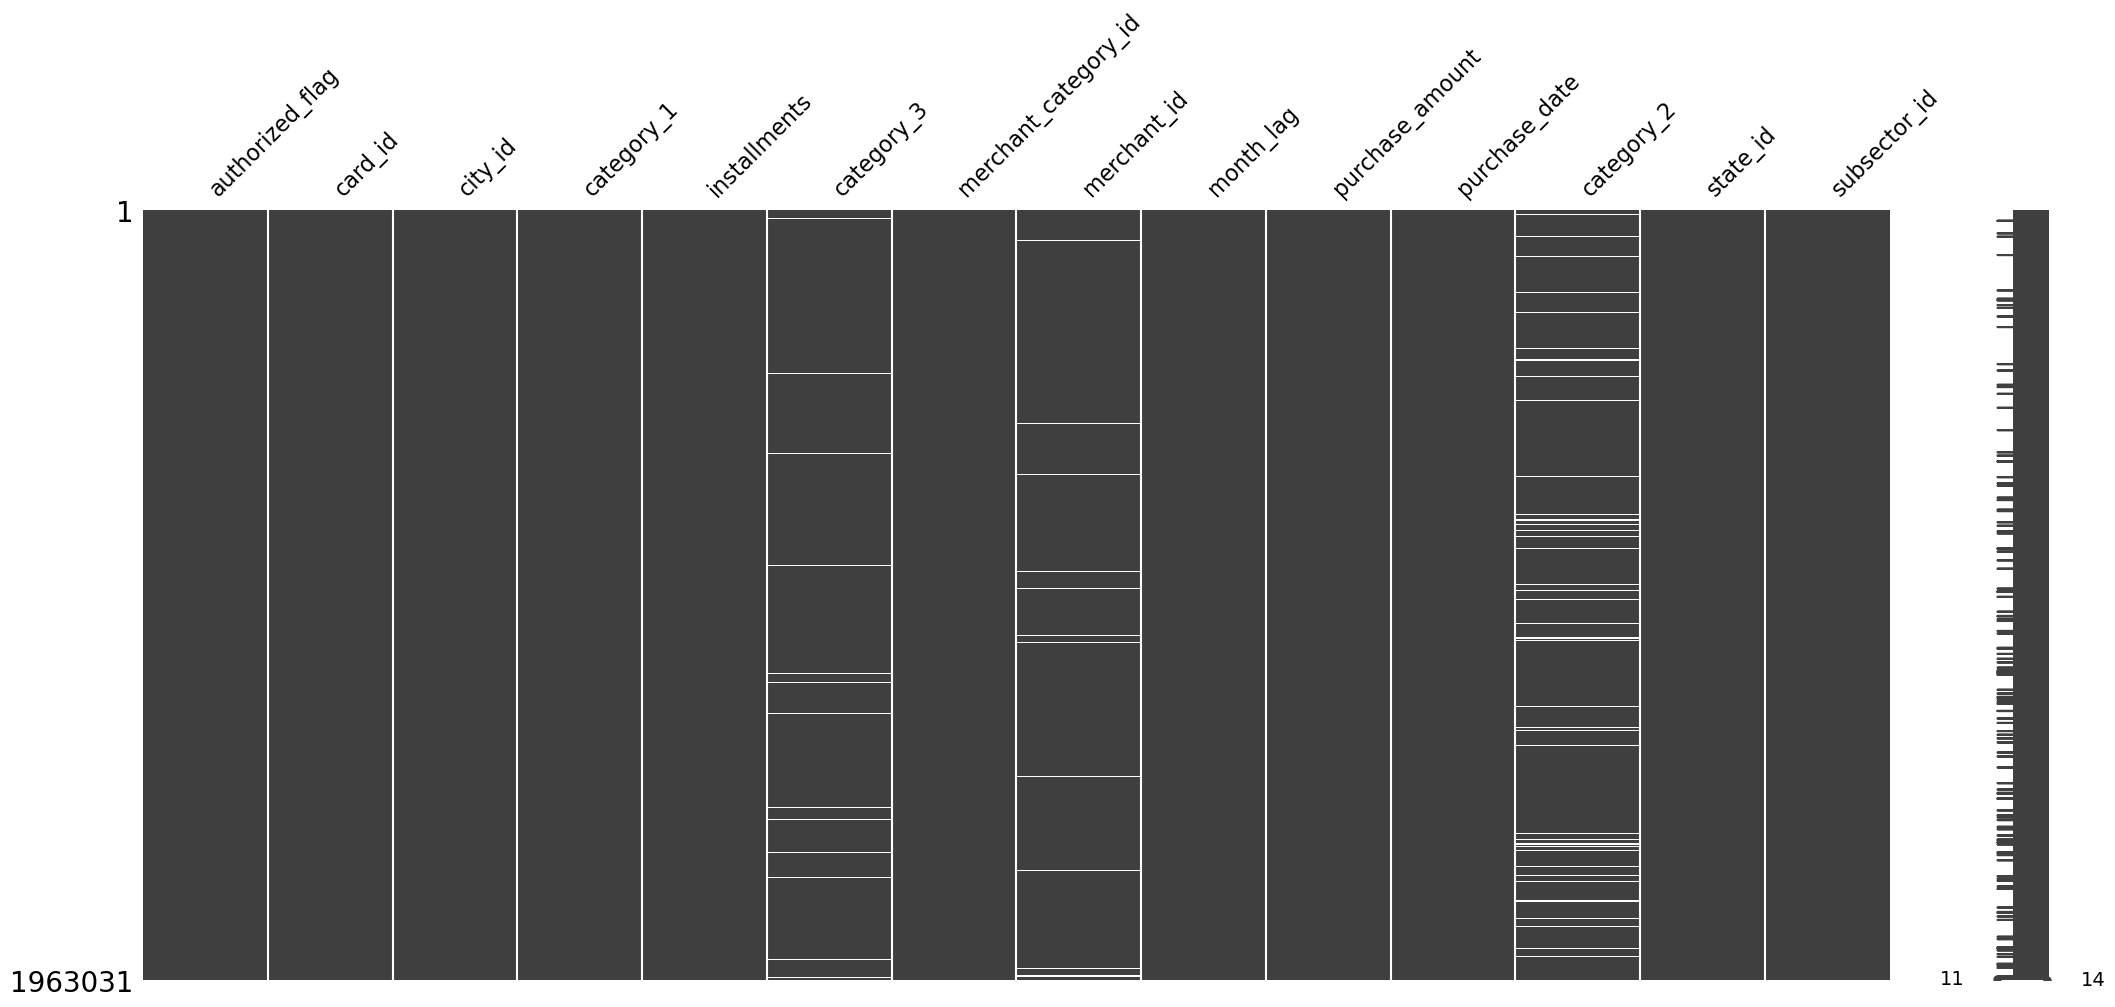

In [20]:
msno.matrix(new_merchant_transactions)

<Axes: >

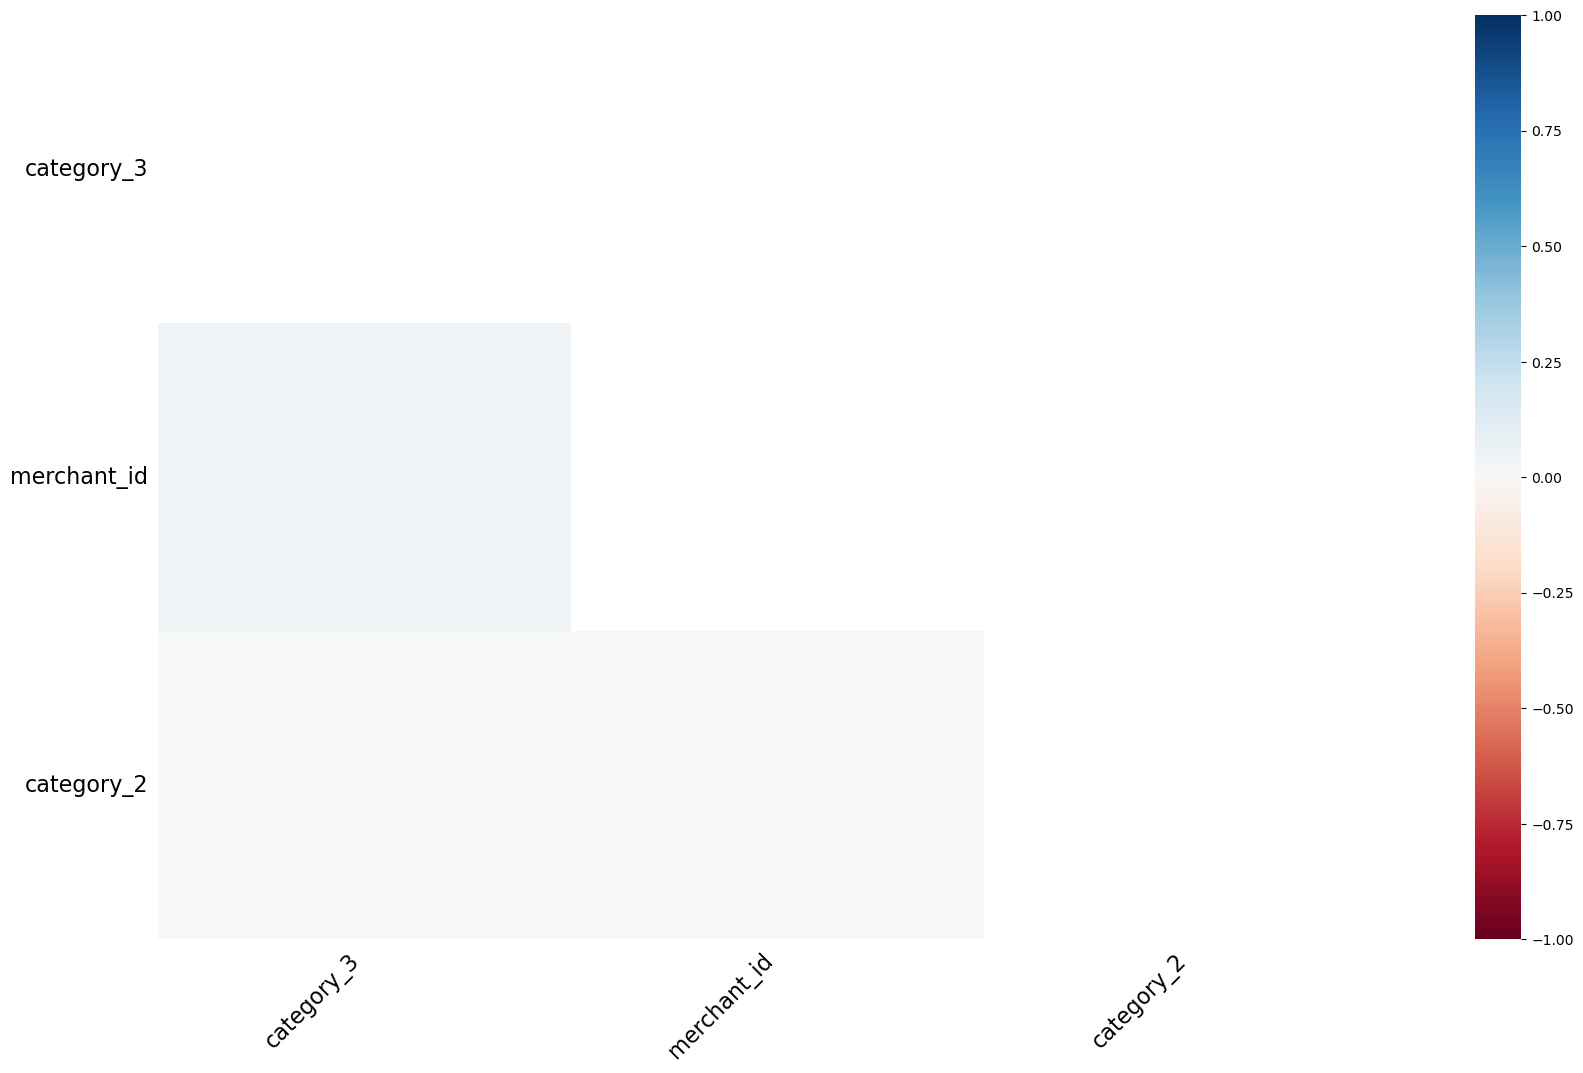

In [21]:
msno.heatmap(new_merchant_transactions[new_merchant_transactions.columns[new_merchant_transactions.isnull().any()].tolist()])

In [22]:
historical_transactions.duplicated().sum() # number of duplicated rows in `historical_transactions` table

0

- The data has no duplication in a row level

- The data has no null rows but has 3 columns with null values

In [23]:
historical_transactions['category_2'].isnull().sum() # check null values in `category_2` in historical_transactions table

2652864

In [24]:
historical_transactions.head() # print some records

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [25]:
user_score.head() # print some records of user_score

,card_id,first_active_month,feature_1,feature_2,feature_3,score
0,C_ID_92a2005557,Jun-17,5,2,1,-0.820283
1,C_ID_3d0044924f,Jan-17,4,1,0,0.392913
2,C_ID_d639edf6cd,Aug-16,2,2,0,0.688056
3,C_ID_186d6a6901,Sep-17,4,3,0,0.142495
4,C_ID_cdbd2c0db2,Nov-17,1,3,0,-0.159749


In [26]:
user_score.shape # number of rows and columns

(201917, 6)

In [27]:
merchants.head(10) # print some records of merchants

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,9.666667,3,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,1.750000,3,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,260.000000,2,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN
5,M_ID_a0915f62b5,20201,87,27,-0.057471,-0.057471,N,E,E,NaN,1.000000,3,NaN,3.666667,6,NaN,3.833333,12,Y,160,21,5.0
6,M_ID_bfd41933db,33861,792,9,-0.057471,-0.057471,N,E,E,NaN,2.833333,3,NaN,4.833333,6,NaN,6.333333,12,N,60,16,1.0
7,M_ID_d8ff08219e,16430,529,20,-0.057471,-0.057471,Y,E,E,NaN,1.000000,3,NaN,1.666667,6,NaN,1.500000,11,Y,-1,-1,NaN
8,M_ID_c5b389236d,37179,813,29,-0.057471,-0.057471,N,E,E,NaN,115.000000,3,NaN,189.916667,6,NaN,197.000000,7,N,248,15,1.0
9,M_ID_d2162ed113,112122,81,29,-0.057471,-0.057471,Y,E,E,NaN,1.000000,2,NaN,1.000000,2,NaN,1.000000,2,Y,-1,-1,NaN


In [28]:
merchants[merchants['merchant_id'].duplicated()].sort_values("merchant_id").head(10) # print sample of duplicated values in merchant_id column

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
112,M_ID_0039220eb3,35,836,5,0.408530,0.408530,Y,C,D,1.17,1.109649,3,1.17,1.087939,6,1.19,0.997021,12,Y,-1,-1,NaN
110970,M_ID_00a6ca8a8a,35,511,7,-0.057471,-0.057471,Y,A,A,0.93,0.949288,3,0.86,0.871214,6,0.76,0.752641,12,Y,-1,-1,NaN
70494,M_ID_07a5671b4c,35,180,20,0.031763,0.031763,N,E,E,1.26,1.142222,3,1.20,1.253333,6,1.15,1.262831,12,N,188,9,1.0
55054,M_ID_0a00fa9e8a,35,302,22,2.123808,2.123808,Y,B,C,1.07,0.968441,3,1.10,0.927764,6,1.06,0.877141,12,Y,-1,-1,NaN
24887,M_ID_0b8ed0c2b0,35,554,25,0.914190,0.914190,Y,C,C,1.21,1.084507,3,1.16,0.979984,6,1.39,1.599542,12,Y,-1,-1,NaN
8173,M_ID_0c4018d3a0,35,879,29,-0.057471,-0.057471,N,E,D,0.51,0.532864,2,0.51,0.532864,2,0.51,0.532864,2,Y,246,1,3.0
334073,M_ID_1802942aaf,72963,302,22,-0.027726,-0.027726,N,A,C,1.01,1.064999,3,0.98,1.102663,6,0.97,1.269495,12,N,96,9,1.0
334071,M_ID_1802942aaf,72963,302,22,-0.047556,-0.047556,N,A,B,0.94,0.954538,3,0.85,0.868956,6,0.57,0.603051,12,N,96,9,1.0
334072,M_ID_1802942aaf,35,302,22,-0.027726,-0.027726,N,A,C,1.01,1.064999,3,0.98,1.102663,6,0.97,1.269495,12,N,96,9,1.0
112217,M_ID_1ceca881f0,35,511,7,9.907008,9.797944,Y,B,B,1.11,1.126791,3,1.13,1.150642,6,1.10,1.110409,12,Y,-1,-1,NaN


In [29]:
merchants['merchant_id'].duplicated().sum() # number of duplicates in merchant_id column

63

In [30]:
merchants.drop_duplicates(subset=['merchant_id'], keep='first', inplace=True) # drop duplicated

In [31]:
merchants['merchant_id'].duplicated().sum() # number of duplicates in merchant_id column

0

In [32]:
new_merchant_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


<a id="pre4"></a>
### 1.2.2 Missing Pattern:
- `Historical Transactions`
    - `Merchant_id` is Missed Completely At Random (MCAR)
    - `category_2`: is Missed Completely At Random (NMAR)
    - `category_3`: is Missed Completely At Random (MCAR)
    
- `new_merchant_transactions`:
    - `Merchant_id` is Missed Completely At Random (MCAR)
    - `category_2`: is Missed Completely At Random (NMAR)
    - `category_3`: is Missed Completely At Random (MCAR)

- `merchant`:
    - `category_2`: is Missed Completely At Random (NMAR)
    - `avg_sales_lag6`: is Missed Completely At Random (MAR)
    - `avg_sales_lag12`: is Missed Completely At Random (MAR)
    - `avg_sales_lag3`: is Missed Completely At Random (MAR)

<a id="pre5"></a>
### 1.2.3 Concatenation and Feature extraction

- The cell below do:
    - concate the **historical_transaction** with **new_merchant_transactions** and create new data frame called **concat_transactions**
    - extract *Month* and *Year* from `purchase_date` column

In [33]:
frames = [historical_transactions, new_merchant_transactions]
concat_transactions = pd.concat(frames) # concatnate the dataframes
concat_transactions['purchase_date'] = pd.to_datetime(concat_transactions['purchase_date'])
concat_transactions['purchase_month'] = concat_transactions['purchase_date'].dt.month
concat_transactions['purchase_year'] = concat_transactions['purchase_date'].dt.year

- The cell below do:
    - Sort the *concat_transactions* by `card_id` and `purchase_data` 
    - Fill null values in `category_3`, `category_2` and `merchant_id` by previous values

In [34]:
concat_transactions = concat_transactions.sort_values(['card_id', 'purchase_date'])
concat_transactions["category_3"] = concat_transactions.groupby("card_id")["category_3"]. fillna(method='ffill') # fill null values in category_3 by last used value based on purchase_date.
concat_transactions["category_2"] = concat_transactions.groupby("card_id")["category_2"].fillna(method='ffill') # fill null values in category_3 by last used value based on purchase_date.
concat_transactions["merchant_id"] = concat_transactions.groupby("card_id")["merchant_id"].fillna(method='ffill') # fill null values in merchant_id by last used value based on purchase_date.

In [35]:
concat_transactions = concat_transactions.reset_index() # reset index because the data was sorted
concat_transactions.drop('index', axis=1, inplace=True) # drop index column
concat_transactions.head() # print sample of data

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,purchase_month,purchase_year
0,Y,C_ID_00007093c1,244,N,2,C,705,M_ID_69423b34e4,-12,0.037176,2017-02-14 14:00:43,3.0,2,33,2,2017
1,Y,C_ID_00007093c1,244,N,1,B,705,M_ID_a33355a1b7,-12,-0.467415,2017-02-14 15:47:45,3.0,2,33,2,2017
2,Y,C_ID_00007093c1,244,N,1,B,307,M_ID_9400cf2342,-12,-0.572600,2017-02-16 15:37:58,3.0,2,19,2,2017
3,Y,C_ID_00007093c1,244,N,3,C,705,M_ID_a33355a1b7,-12,-0.331575,2017-02-20 12:19:01,3.0,2,33,2,2017
4,Y,C_ID_00007093c1,244,N,1,B,307,M_ID_9400cf2342,-11,-0.483944,2017-03-03 00:24:15,3.0,2,19,3,2017


In [36]:
concat_transactions.duplicated().sum() # check duplication

246

In [37]:
concat_transactions.drop_duplicates(inplace=True) # drop duplication

In [38]:
concat_transactions['authorized_flag'].value_counts() # check unique values in `authorized_flag` column

authorized_flag
Y    28558482
N     2516664
Name: count, dtype: int64

In [39]:
merchants.isna().sum().sort_values(ascending=False)

category_2                     11863
avg_sales_lag6                    13
avg_sales_lag12                   13
avg_sales_lag3                    13
state_id                           0
city_id                            0
category_4                         0
active_months_lag12                0
avg_purchases_lag12                0
active_months_lag6                 0
avg_purchases_lag6                 0
merchant_id                        0
merchant_group_id                  0
avg_purchases_lag3                 0
most_recent_purchases_range        0
most_recent_sales_range            0
category_1                         0
numerical_2                        0
numerical_1                        0
subsector_id                       0
merchant_category_id               0
active_months_lag3                 0
dtype: int64

In [40]:
merchants["category_2"] = merchants.groupby("merchant_id")["category_2"].fillna(merchants['category_2'].mode()[0]) # fill null values in category_2 by last used value based on purchase_date.
merchants["avg_sales_lag6 "] = merchants.groupby("merchant_id")["avg_sales_lag6"].fillna(merchants['avg_sales_lag6'].mode()[0]) # fill null values in avg_sales_lag6 by last used value based on purchase_date.
merchants["avg_sales_lag12"] = merchants.groupby("merchant_id")["avg_sales_lag12"].fillna(merchants['avg_sales_lag12'].mode()[0]) # fill null values in avg_sales_lag12 by last used value based on purchase_date.
merchants["avg_sales_lag3"] = merchants.groupby("merchant_id")["avg_sales_lag3"].fillna(merchants['avg_sales_lag3'].mode()[0]) # fill null values in avg_sales_lag3 by last used value based on purchase_date.

<a id="pre6"></a>
### 1.2.4 Data Joining with Marchant Table

In [41]:
concat_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,purchase_month,purchase_year
0,Y,C_ID_00007093c1,244,N,2,C,705,M_ID_69423b34e4,-12,0.037176,2017-02-14 14:00:43,3.0,2,33,2,2017
1,Y,C_ID_00007093c1,244,N,1,B,705,M_ID_a33355a1b7,-12,-0.467415,2017-02-14 15:47:45,3.0,2,33,2,2017
2,Y,C_ID_00007093c1,244,N,1,B,307,M_ID_9400cf2342,-12,-0.572600,2017-02-16 15:37:58,3.0,2,19,2,2017
3,Y,C_ID_00007093c1,244,N,3,C,705,M_ID_a33355a1b7,-12,-0.331575,2017-02-20 12:19:01,3.0,2,33,2,2017
4,Y,C_ID_00007093c1,244,N,1,B,307,M_ID_9400cf2342,-11,-0.483944,2017-03-03 00:24:15,3.0,2,19,3,2017


In [42]:
concat_transactions.shape

(31075146, 16)

In [43]:
concat_transactions_joined_merchant = pd.merge(concat_transactions, merchants, left_on='merchant_id', right_on='merchant_id',suffixes=('_trans', '_merchant'), how='inner')

In [44]:
concat_transactions_joined_merchant.head()

,authorized_flag,card_id,city_id_trans,category_1_trans,installments,category_3,merchant_category_id_trans,merchant_id,month_lag,purchase_amount,purchase_date,category_2_trans,state_id_trans,subsector_id_trans,purchase_month,purchase_year,merchant_group_id,merchant_category_id_merchant,subsector_id_merchant,numerical_1,numerical_2,category_1_merchant,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id_merchant,state_id_merchant,category_2_merchant,avg_sales_lag6
0,Y,C_ID_00007093c1,244,N,2,C,705,M_ID_69423b34e4,-12,0.037176,2017-02-14 14:00:43,3.0,2,33,2,2017,35,705,33,15.855951,15.826206,N,A,A,1.07,1.07929,3,1.12,1.101227,6,1.15,1.08779,12,N,-1,2,3.0,1.12
1,Y,C_ID_00007093c1,244,N,1,B,705,M_ID_69423b34e4,-11,-0.401298,2017-03-08 15:05:29,3.0,2,33,3,2017,35,705,33,15.855951,15.826206,N,A,A,1.07,1.07929,3,1.12,1.101227,6,1.15,1.08779,12,N,-1,2,3.0,1.12
2,Y,C_ID_00007093c1,244,N,1,B,705,M_ID_69423b34e4,-11,-0.566590,2017-03-11 15:04:31,3.0,2,33,3,2017,35,705,33,15.855951,15.826206,N,A,A,1.07,1.07929,3,1.12,1.101227,6,1.15,1.08779,12,N,-1,2,3.0,1.12
3,Y,C_ID_00007093c1,244,N,1,B,705,M_ID_69423b34e4,-11,-0.677936,2017-03-11 15:10:15,3.0,2,33,3,2017,35,705,33,15.855951,15.826206,N,A,A,1.07,1.07929,3,1.12,1.101227,6,1.15,1.08779,12,N,-1,2,3.0,1.12
4,Y,C_ID_00007093c1,244,N,1,B,705,M_ID_69423b34e4,-11,-0.566590,2017-03-11 15:26:58,3.0,2,33,3,2017,35,705,33,15.855951,15.826206,N,A,A,1.07,1.07929,3,1.12,1.101227,6,1.15,1.08779,12,N,-1,2,3.0,1.12


In [45]:
# concat_transactions_joined_merchant['merchant_group_id'].value_counts()

In [46]:
merchants.shape

(334633, 23)

In [47]:
merchants.isnull().sum()

merchant_id                     0
merchant_group_id               0
merchant_category_id            0
subsector_id                    0
numerical_1                     0
numerical_2                     0
category_1                      0
most_recent_sales_range         0
most_recent_purchases_range     0
avg_sales_lag3                  0
avg_purchases_lag3              0
active_months_lag3              0
avg_sales_lag6                 13
avg_purchases_lag6              0
active_months_lag6              0
avg_sales_lag12                 0
avg_purchases_lag12             0
active_months_lag12             0
category_4                      0
city_id                         0
state_id                        0
category_2                      0
avg_sales_lag6                  0
dtype: int64

In [48]:
concat_transactions_joined_merchant.shape

(31074719, 38)

- The cell below convert categorical columns into numeric columns

In [49]:
dummy_df = pd.get_dummies(data=concat_transactions_joined_merchant, columns=['category_1_trans', 'category_3', 'category_2_trans', 'purchase_month', 'purchase_year', 'authorized_flag', 'category_2_merchant', 'category_4', 'most_recent_purchases_range', 'category_1_merchant', 'most_recent_sales_range'])

In [50]:
dummy_df.head()

,card_id,city_id_trans,installments,merchant_category_id_trans,merchant_id,month_lag,purchase_amount,purchase_date,state_id_trans,subsector_id_trans,merchant_group_id,merchant_category_id_merchant,subsector_id_merchant,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,city_id_merchant,state_id_merchant,avg_sales_lag6,category_1_trans_N,category_1_trans_Y,category_3_A,category_3_B,category_3_C,category_2_trans_1.0,category_2_trans_2.0,category_2_trans_3.0,category_2_trans_4.0,category_2_trans_5.0,purchase_month_1,purchase_month_2,purchase_month_3,purchase_month_4,purchase_month_5,purchase_month_6,purchase_month_7,purchase_month_8,purchase_month_9,purchase_month_10,purchase_month_11,purchase_month_12,purchase_year_2017,purchase_year_2018,authorized_flag_N,authorized_flag_Y,category_2_merchant_1.0,category_2_merchant_2.0,category_2_merchant_3.0,category_2_merchant_4.0,category_2_merchant_5.0,category_4_N,category_4_Y,most_recent_purchases_range_A,most_recent_purchases_range_B,most_recent_purchases_range_C,most_recent_purchases_range_D,most_recent_purchases_range_E,category_1_merchant_N,category_1_merchant_Y,most_recent_sales_range_A,most_recent_sales_range_B,most_recent_sales_range_C,most_recent_sales_range_D,most_recent_sales_range_E
0,C_ID_00007093c1,244,2,705,M_ID_69423b34e4,-12,0.037176,2017-02-14 14:00:43,2,33,35,705,33,15.855951,15.826206,1.07,1.07929,3,1.12,1.101227,6,1.15,1.08779,12,-1,2,1.12,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False
1,C_ID_00007093c1,244,1,705,M_ID_69423b34e4,-11,-0.401298,2017-03-08 15:05:29,2,33,35,705,33,15.855951,15.826206,1.07,1.07929,3,1.12,1.101227,6,1.15,1.08779,12,-1,2,1.12,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False
2,C_ID_00007093c1,244,1,705,M_ID_69423b34e4,-11,-0.566590,2017-03-11 15:04:31,2,33,35,705,33,15.855951,15.826206,1.07,1.07929,3,1.12,1.101227,6,1.15,1.08779,12,-1,2,1.12,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False
3,C_ID_00007093c1,244,1,705,M_ID_69423b34e4,-11,-0.677936,2017-03-11 15:10:15,2,33,35,705,33,15.855951,15.826206,1.07,1.07929,3,1.12,1.101227,6,1.15,1.08779,12,-1,2,1.12,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False
4,C_ID_00007093c1,244,1,705,M_ID_69423b34e4,-11,-0.566590,2017-03-11 15:26:58,2,33,35,705,33,15.855951,15.826206,1.07,1.07929,3,1.12,1.101227,6,1.15,1.08779,12,-1,2,1.12,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False


- The cell below drop irrelevant columns

In [51]:
dummy_df.drop(['merchant_category_id_trans', 'city_id_trans', 'state_id_trans', 'subsector_id_trans', 'month_lag', 'installments', 'purchase_date', 'avg_purchases_lag6', 'merchant_group_id', 'merchant_category_id_merchant', 'subsector_id_merchant', 'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3', 'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6', 'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12', 'city_id_merchant', 'state_id_merchant', 'avg_sales_lag6', 'avg_sales_lag6'], axis =1, inplace=True)

In [52]:
dummy_df.head()

,card_id,merchant_id,purchase_amount,numerical_1,numerical_2,avg_sales_lag6,category_1_trans_N,category_1_trans_Y,category_3_A,category_3_B,category_3_C,category_2_trans_1.0,category_2_trans_2.0,category_2_trans_3.0,category_2_trans_4.0,category_2_trans_5.0,purchase_month_1,purchase_month_2,purchase_month_3,purchase_month_4,purchase_month_5,purchase_month_6,purchase_month_7,purchase_month_8,purchase_month_9,purchase_month_10,purchase_month_11,purchase_month_12,purchase_year_2017,purchase_year_2018,authorized_flag_N,authorized_flag_Y,category_2_merchant_1.0,category_2_merchant_2.0,category_2_merchant_3.0,category_2_merchant_4.0,category_2_merchant_5.0,category_4_N,category_4_Y,most_recent_purchases_range_A,most_recent_purchases_range_B,most_recent_purchases_range_C,most_recent_purchases_range_D,most_recent_purchases_range_E,category_1_merchant_N,category_1_merchant_Y,most_recent_sales_range_A,most_recent_sales_range_B,most_recent_sales_range_C,most_recent_sales_range_D,most_recent_sales_range_E
0,C_ID_00007093c1,M_ID_69423b34e4,0.037176,15.855951,15.826206,1.12,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False
1,C_ID_00007093c1,M_ID_69423b34e4,-0.401298,15.855951,15.826206,1.12,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False
2,C_ID_00007093c1,M_ID_69423b34e4,-0.566590,15.855951,15.826206,1.12,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False
3,C_ID_00007093c1,M_ID_69423b34e4,-0.677936,15.855951,15.826206,1.12,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False
4,C_ID_00007093c1,M_ID_69423b34e4,-0.566590,15.855951,15.826206,1.12,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False


In [53]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31074719 entries, 0 to 31074718
Data columns (total 51 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   card_id                        object 
 1   merchant_id                    object 
 2   purchase_amount                float64
 3   numerical_1                    float64
 4   numerical_2                    float64
 5   avg_sales_lag6                 float64
 6   category_1_trans_N             bool   
 7   category_1_trans_Y             bool   
 8   category_3_A                   bool   
 9   category_3_B                   bool   
 10  category_3_C                   bool   
 11  category_2_trans_1.0           bool   
 12  category_2_trans_2.0           bool   
 13  category_2_trans_3.0           bool   
 14  category_2_trans_4.0           bool   
 15  category_2_trans_5.0           bool   
 16  purchase_month_1               bool   
 17  purchase_month_2               bool   
 18  

<a id="pre7"></a>
### 1.2.5 Data Grouping And Aggregations

- The cell below do:
    - group by card_id in transactions files
    - aggregate select columns
    - nunique for `merchant_id` refers to number of unique merchant that this card used with
    - The summtion of other features is done after doing one hot encoding using get_dummies so we can see which type is used most frequently with each card

In [65]:
grouped_df = dummy_df.groupby('card_id').agg({
    'merchant_id': ['nunique'],
    'purchase_amount': ['sum'],
    'category_1_trans_N': ['sum'],
    'category_1_trans_Y': ['sum'],
    'category_3_A': ['sum'],
    'category_3_B': ['sum'],
    'category_3_C': ['sum'],
    'category_2_trans_1.0': ['sum'],
    'category_2_trans_2.0': ['sum'],
    'category_2_trans_3.0': ['sum'],
    'category_2_trans_4.0': ['sum'],
    'category_2_trans_5.0': ['sum'],
    'purchase_month_1': ['sum'],
    'purchase_month_2': ['sum'],
    'purchase_month_3': ['sum'],
    'purchase_month_5': ['sum'],
    'purchase_month_6': ['sum'],
    'purchase_month_7': ['sum'],
    'purchase_month_8': ['sum'],
    'purchase_month_9': ['sum'],
    'purchase_month_10': ['sum'],
    'purchase_month_11': ['sum'],
    'purchase_month_12': ['sum'],
    'purchase_year_2017': ['sum'],
    'purchase_year_2018': ['sum'],
    'authorized_flag_N': ['sum'],
    'authorized_flag_Y': ['sum'],
    'category_2_merchant_1.0': ['sum'],
    'category_2_merchant_2.0': ['sum'],
    'category_2_merchant_3.0': ['sum'],
    'category_2_merchant_4.0': ['sum'],
    'category_2_merchant_5.0': ['sum'],
    'category_4_N': ['sum'],
    'category_4_Y': ['sum'],
    'most_recent_purchases_range_A': ['sum'],
    'most_recent_purchases_range_B': ['sum'],
    'most_recent_purchases_range_C': ['sum'],
    'most_recent_purchases_range_D': ['sum'],
    'most_recent_purchases_range_E': ['sum'],
    'category_1_merchant_N': ['sum'],
    'category_1_merchant_Y': ['sum'],
    'most_recent_sales_range_A': ['sum'],
    'most_recent_sales_range_B': ['sum'],
    'most_recent_sales_range_C': ['sum'],
    'most_recent_sales_range_D': ['sum'],
    'most_recent_sales_range_E': ['sum'],
    
    
    
})

In [66]:
grouped_df.head(10)

,merchant_id,purchase_amount,category_1_trans_N,category_1_trans_Y,category_3_A,category_3_B,category_3_C,category_2_trans_1.0,category_2_trans_2.0,category_2_trans_3.0,category_2_trans_4.0,category_2_trans_5.0,purchase_month_1,purchase_month_2,purchase_month_3,purchase_month_5,purchase_month_6,purchase_month_7,purchase_month_8,purchase_month_9,purchase_month_10,purchase_month_11,purchase_month_12,purchase_year_2017,purchase_year_2018,authorized_flag_N,authorized_flag_Y,category_2_merchant_1.0,category_2_merchant_2.0,category_2_merchant_3.0,category_2_merchant_4.0,category_2_merchant_5.0,category_4_N,category_4_Y,most_recent_purchases_range_A,most_recent_purchases_range_B,most_recent_purchases_range_C,most_recent_purchases_range_D,most_recent_purchases_range_E,category_1_merchant_N,category_1_merchant_Y,most_recent_sales_range_A,most_recent_sales_range_B,most_recent_sales_range_C,most_recent_sales_range_D,most_recent_sales_range_E
,nunique,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
card_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C_ID_00007093c1,31,-78.173565,123,28,0,127,24,1,0,149,0,1,10,16,10,10,19,15,17,5,17,6,12,127,24,35,116,29,0,122,0,0,100,51,44,17,12,64,14,122,29,51,12,14,61,13
C_ID_0001238066,90,-87.297257,145,4,0,113,36,126,0,0,0,23,26,24,17,0,0,0,0,2,11,23,37,73,76,3,146,128,0,0,0,21,119,30,23,43,54,18,11,138,11,22,24,72,23,8
C_ID_0001506ef0,29,-36.049233,68,0,67,1,0,2,0,66,0,0,9,11,10,1,3,2,2,2,3,7,18,53,15,4,64,2,0,66,0,0,1,67,27,7,19,12,3,66,2,24,12,17,12,3
C_ID_0001793786,150,-37.015633,245,2,242,5,0,79,147,20,0,1,2,6,16,4,37,29,34,38,20,21,10,247,0,27,220,47,186,14,0,0,74,173,31,39,79,69,29,217,30,29,46,88,55,29
C_ID_000183fdda,84,-75.428717,151,4,0,114,41,7,1,146,0,1,28,28,8,0,0,0,6,22,25,9,26,88,67,7,148,15,0,140,0,0,7,148,6,42,52,33,22,140,15,7,51,49,29,19
C_ID_00024e244b,19,-41.552753,70,0,65,5,0,3,0,67,0,0,13,3,2,4,0,6,21,5,3,2,7,63,7,17,53,3,0,67,0,0,35,35,7,21,12,26,4,67,3,7,6,25,21,11
C_ID_0002709b5a,38,-49.678369,70,6,0,63,13,2,58,0,0,16,11,2,2,3,7,7,6,5,9,10,12,61,15,6,70,8,0,0,0,68,53,23,12,30,10,13,11,68,8,12,25,18,10,11
C_ID_00027503e2,12,-31.123047,42,0,42,0,0,3,0,39,0,0,4,0,0,1,6,10,5,4,3,5,4,38,4,18,24,3,0,39,0,0,39,3,0,2,33,4,3,39,3,0,4,22,11,5


In [67]:
grouped_df = grouped_df.reset_index()

In [68]:
# get new columns name to rename columns in result grouped data frame
column_names = []
for i in grouped_df.columns:
    column_names.append(i[0] + '_' + i[1])

In [69]:
column_names

['card_id_',
 'merchant_id_nunique',
 'purchase_amount_sum',
 'category_1_trans_N_sum',
 'category_1_trans_Y_sum',
 'category_3_A_sum',
 'category_3_B_sum',
 'category_3_C_sum',
 'category_2_trans_1.0_sum',
 'category_2_trans_2.0_sum',
 'category_2_trans_3.0_sum',
 'category_2_trans_4.0_sum',
 'category_2_trans_5.0_sum',
 'purchase_month_1_sum',
 'purchase_month_2_sum',
 'purchase_month_3_sum',
 'purchase_month_5_sum',
 'purchase_month_6_sum',
 'purchase_month_7_sum',
 'purchase_month_8_sum',
 'purchase_month_9_sum',
 'purchase_month_10_sum',
 'purchase_month_11_sum',
 'purchase_month_12_sum',
 'purchase_year_2017_sum',
 'purchase_year_2018_sum',
 'authorized_flag_N_sum',
 'authorized_flag_Y_sum',
 'category_2_merchant_1.0_sum',
 'category_2_merchant_2.0_sum',
 'category_2_merchant_3.0_sum',
 'category_2_merchant_4.0_sum',
 'category_2_merchant_5.0_sum',
 'category_4_N_sum',
 'category_4_Y_sum',
 'most_recent_purchases_range_A_sum',
 'most_recent_purchases_range_B_sum',
 'most_recent_p

In [60]:
grouped_df.head()

,card_id,merchant_id,purchase_amount,category_1_trans_N,category_1_trans_Y,category_3_A,category_3_B,category_3_C,category_2_trans_1.0,category_2_trans_2.0,category_2_trans_3.0,category_2_trans_4.0,category_2_trans_5.0,purchase_month_1,purchase_month_2,purchase_month_3,purchase_month_5,purchase_month_6,purchase_month_7,purchase_month_8,purchase_month_9,purchase_month_10,purchase_month_11,purchase_month_12,purchase_year_2017,purchase_year_2018,authorized_flag_N,authorized_flag_Y,category_2_merchant_1.0,category_2_merchant_2.0,category_2_merchant_3.0,category_2_merchant_4.0,category_2_merchant_5.0,category_4_N,category_4_Y,most_recent_purchases_range_A,most_recent_purchases_range_B,most_recent_purchases_range_C,most_recent_purchases_range_D,most_recent_purchases_range_E,category_1_merchant_N,category_1_merchant_Y,most_recent_sales_range_A,most_recent_sales_range_B,most_recent_sales_range_C,most_recent_sales_range_D,most_recent_sales_range_E
0,C_ID_00007093c1,31,-78.173565,123,28,0,127,24,1,0,149,0,1,10,16,10,10,19,15,17,5,17,6,12,127,24,35,116,29,0,122,0,0,100,51,44,17,12,64,14,122,29,51,12,14,61,13
1,C_ID_0001238066,90,-87.297257,145,4,0,113,36,126,0,0,0,23,26,24,17,0,0,0,0,2,11,23,37,73,76,3,146,128,0,0,0,21,119,30,23,43,54,18,11,138,11,22,24,72,23,8
2,C_ID_0001506ef0,29,-36.049233,68,0,67,1,0,2,0,66,0,0,9,11,10,1,3,2,2,2,3,7,18,53,15,4,64,2,0,66,0,0,1,67,27,7,19,12,3,66,2,24,12,17,12,3
3,C_ID_0001793786,150,-37.015633,245,2,242,5,0,79,147,20,0,1,2,6,16,4,37,29,34,38,20,21,10,247,0,27,220,47,186,14,0,0,74,173,31,39,79,69,29,217,30,29,46,88,55,29
4,C_ID_000183fdda,84,-75.428717,151,4,0,114,41,7,1,146,0,1,28,28,8,0,0,0,6,22,25,9,26,88,67,7,148,15,0,140,0,0,7,148,6,42,52,33,22,140,15,7,51,49,29,19


In [71]:
grouped_df = grouped_df.set_axis(column_names, axis=1) # rename column names
grouped_df

,card_id_,merchant_id_nunique,purchase_amount_sum,category_1_trans_N_sum,category_1_trans_Y_sum,category_3_A_sum,category_3_B_sum,category_3_C_sum,category_2_trans_1.0_sum,category_2_trans_2.0_sum,category_2_trans_3.0_sum,category_2_trans_4.0_sum,category_2_trans_5.0_sum,purchase_month_1_sum,purchase_month_2_sum,purchase_month_3_sum,purchase_month_5_sum,purchase_month_6_sum,purchase_month_7_sum,purchase_month_8_sum,purchase_month_9_sum,purchase_month_10_sum,purchase_month_11_sum,purchase_month_12_sum,purchase_year_2017_sum,purchase_year_2018_sum,authorized_flag_N_sum,authorized_flag_Y_sum,category_2_merchant_1.0_sum,category_2_merchant_2.0_sum,category_2_merchant_3.0_sum,category_2_merchant_4.0_sum,category_2_merchant_5.0_sum,category_4_N_sum,category_4_Y_sum,most_recent_purchases_range_A_sum,most_recent_purchases_range_B_sum,most_recent_purchases_range_C_sum,most_recent_purchases_range_D_sum,most_recent_purchases_range_E_sum,category_1_merchant_N_sum,category_1_merchant_Y_sum,most_recent_sales_range_A_sum,most_recent_sales_range_B_sum,most_recent_sales_range_C_sum,most_recent_sales_range_D_sum,most_recent_sales_range_E_sum
0,C_ID_00007093c1,31,-78.173565,123,28,0,127,24,1,0,149,0,1,10,16,10,10,19,15,17,5,17,6,12,127,24,35,116,29,0,122,0,0,100,51,44,17,12,64,14,122,29,51,12,14,61,13
1,C_ID_0001238066,90,-87.297257,145,4,0,113,36,126,0,0,0,23,26,24,17,0,0,0,0,2,11,23,37,73,76,3,146,128,0,0,0,21,119,30,23,43,54,18,11,138,11,22,24,72,23,8
2,C_ID_0001506ef0,29,-36.049233,68,0,67,1,0,2,0,66,0,0,9,11,10,1,3,2,2,2,3,7,18,53,15,4,64,2,0,66,0,0,1,67,27,7,19,12,3,66,2,24,12,17,12,3
3,C_ID_0001793786,150,-37.015633,245,2,242,5,0,79,147,20,0,1,2,6,16,4,37,29,34,38,20,21,10,247,0,27,220,47,186,14,0,0,74,173,31,39,79,69,29,217,30,29,46,88,55,29
4,C_ID_000183fdda,84,-75.428717,151,4,0,114,41,7,1,146,0,1,28,28,8,0,0,0,6,22,25,9,26,88,67,7,148,15,0,140,0,0,7,148,6,42,52,33,22,140,15,7,51,49,29,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325535,C_ID_ffff1d9928,12,-9.938024,13,3,0,13,2,1,0,0,15,0,5,0,1,0,0,0,0,0,2,2,3,7,9,3,13,3,0,0,13,0,13,3,2,4,2,6,2,13,3,2,0,7,4,3
325536,C_ID_ffff579d3a,63,-80.957030,115,0,112,3,0,114,0,0,0,1,15,7,1,0,0,0,22,41,3,10,16,92,23,15,100,115,0,0,0,0,79,36,20,25,29,33,8,103,12,19,19,35,18,24
325537,C_ID_ffff756266,14,-5.127842,22,3,0,12,13,25,0,0,0,0,6,0,4,0,5,1,0,5,3,0,0,24,1,10,15,25,0,0,0,0,20,5,6,2,10,6,1,20,5,5,5,11,3,1
325538,C_ID_ffff828181,97,-125.063404,187,11,0,175,23,20,167,0,10,1,32,16,17,17,12,7,20,10,26,9,25,167,31,24,174,32,155,0,10,1,174,24,13,48,66,51,20,179,19,8,61,65,46,18


<a id="pre8"></a>
### 1.2.6 Data joining with user score

- The cell below do:
    - Inner join **user_score** table and all transactions in grouped data frame using `card_id` 

In [72]:
joined_df = pd.merge(grouped_df, user_score, left_on='card_id_', right_on='card_id',suffixes=('_trans', '_score'), how='inner')

In [73]:
joined_df.drop(['first_active_month', 'card_id'], axis=1, inplace=True) # drop duplicated and irrelvant columns
joined_df.head()

,card_id_,merchant_id_nunique,purchase_amount_sum,category_1_trans_N_sum,category_1_trans_Y_sum,category_3_A_sum,category_3_B_sum,category_3_C_sum,category_2_trans_1.0_sum,category_2_trans_2.0_sum,category_2_trans_3.0_sum,category_2_trans_4.0_sum,category_2_trans_5.0_sum,purchase_month_1_sum,purchase_month_2_sum,purchase_month_3_sum,purchase_month_5_sum,purchase_month_6_sum,purchase_month_7_sum,purchase_month_8_sum,purchase_month_9_sum,purchase_month_10_sum,purchase_month_11_sum,purchase_month_12_sum,purchase_year_2017_sum,purchase_year_2018_sum,authorized_flag_N_sum,authorized_flag_Y_sum,category_2_merchant_1.0_sum,category_2_merchant_2.0_sum,category_2_merchant_3.0_sum,category_2_merchant_4.0_sum,category_2_merchant_5.0_sum,category_4_N_sum,category_4_Y_sum,most_recent_purchases_range_A_sum,most_recent_purchases_range_B_sum,most_recent_purchases_range_C_sum,most_recent_purchases_range_D_sum,most_recent_purchases_range_E_sum,category_1_merchant_N_sum,category_1_merchant_Y_sum,most_recent_sales_range_A_sum,most_recent_sales_range_B_sum,most_recent_sales_range_C_sum,most_recent_sales_range_D_sum,most_recent_sales_range_E_sum,feature_1,feature_2,feature_3,score
0,C_ID_00007093c1,31,-78.173565,123,28,0,127,24,1,0,149,0,1,10,16,10,10,19,15,17,5,17,6,12,127,24,35,116,29,0,122,0,0,100,51,44,17,12,64,14,122,29,51,12,14,61,13,5,1,1,0.134077
1,C_ID_0001506ef0,29,-36.049233,68,0,67,1,0,2,0,66,0,0,9,11,10,1,3,2,2,2,3,7,18,53,15,4,64,2,0,66,0,0,1,67,27,7,19,12,3,66,2,24,12,17,12,3,2,2,0,0.884295
2,C_ID_000183fdda,84,-75.428717,151,4,0,114,41,7,1,146,0,1,28,28,8,0,0,0,6,22,25,9,26,88,67,7,148,15,0,140,0,0,7,148,6,42,52,33,22,140,15,7,51,49,29,19,4,1,0,-0.264433
3,C_ID_00027503e2,12,-31.123047,42,0,42,0,0,3,0,39,0,0,4,0,0,1,6,10,5,4,3,5,4,38,4,18,24,3,0,39,0,0,39,3,0,2,33,4,3,39,3,0,4,22,11,5,3,1,1,0.812872
4,C_ID_0002c7c2c1,44,-48.113118,73,0,73,0,0,73,0,0,0,0,7,3,3,4,10,7,5,7,4,12,10,60,13,9,64,73,0,0,0,0,9,64,35,7,9,13,9,68,5,35,8,9,6,15,3,2,1,1.288514


In [74]:
joined_df['card_id_'].duplicated().sum() # check duplication

0

In [75]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 51 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   card_id_                           201917 non-null  object 
 1   merchant_id_nunique                201917 non-null  int64  
 2   purchase_amount_sum                201917 non-null  float64
 3   category_1_trans_N_sum             201917 non-null  int64  
 4   category_1_trans_Y_sum             201917 non-null  int64  
 5   category_3_A_sum                   201917 non-null  int64  
 6   category_3_B_sum                   201917 non-null  int64  
 7   category_3_C_sum                   201917 non-null  int64  
 8   category_2_trans_1.0_sum           201917 non-null  int64  
 9   category_2_trans_2.0_sum           201917 non-null  int64  
 10  category_2_trans_3.0_sum           201917 non-null  int64  
 11  category_2_trans_4.0_sum           2019

<a id="pre9"></a>
### 1.2.7 Normality And Correlation Check Using hypothesis testing

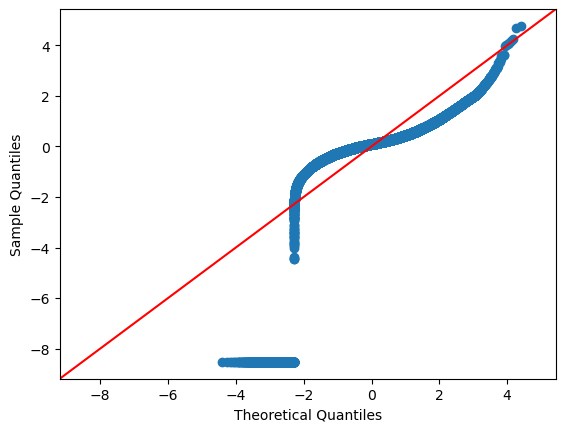

In [76]:
from scipy.stats import norm
import statsmodels.api as sm
from scipy.stats import normaltest
from scipy import stats
import matplotlib.pyplot as plt
fig = sm.qqplot(joined_df['score'], line='45', fit = True)
plt.show()

#### Normality Check

- The Cell Below do:
    - Check normality of score column

In [77]:
statistic, p_value_Agostino = normaltest(joined_df['score'])
w, p_value_shpiro = stats.shapiro(joined_df['score']) #p value obtained from the Shapiro-Wilk test is significant (p < 0.05), we conclude that the data is not normally distribute
print("p_value Agostino = {:g}".format(p_value_Agostino))
print("p_value shapiro = {:g}".format(p_value_shpiro))

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html 

p_value Agostino = 0
p_value shapiro = 0


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Correlation Check

- The P-Value for the two previous test is very small it is equal to zero so we can reject the null and say than the score column is not normaily distributed

- The Two Cells below do:
    - Check Correlation between `feature_3` and `feature_2`
        - Reason: if there is a correlation between thoses two features so we can drop one of them to avoid Multicollinearity.
        - H0: there is a correlation between the two features
        - H1: there is no correlation between the two features
        - as the p-value is very small, smaller than 0.05 so we can reject the null and say there is no correlation between the two feature as the common area under the curve - p-value- is very small which indicates there is no correlation
    - Check Correlation between `feature_1` and `feature_2`
         - Reason: if there is a correlation between thoses two features so we can drop one of them to avoid Multicollinearity.
        - H0: there is a correlation between the two features
        - H1: there is no correlation between the two features
        - as the p-value is very small, smaller than 0.05 so we can reject the null and say there is no correlation between the two feature as the common area under the curve - p-value- is very small which indicates there is no correlation

In [78]:
stats.mannwhitneyu(x=joined_df['feature_3'] / joined_df['feature_3'].max(), y=joined_df['feature_2'] / joined_df['feature_2'].max(), alternative = 'two-sided')

MannwhitneyuResult(statistic=20898119802.0, pvalue=2.8251471668129775e-47)

In [79]:
stats.mannwhitneyu(x=joined_df['feature_1'] / joined_df['feature_1'].max(), y=joined_df['feature_2'] / joined_df['feature_2'].max(), alternative = 'two-sided')

MannwhitneyuResult(statistic=22242322600.0, pvalue=0.0)

#### Double Check using the Pearson correlation coefficient and Spearman rank correlation coefficient

In [83]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr
scorr = spearmanr(joined_df['feature_3'] / joined_df['feature_3'].max(), joined_df['feature_2'] / joined_df['feature_2'].max())
pcorr = pearsonr(joined_df['feature_3'] / joined_df['feature_3'].max(), joined_df['feature_2'] / joined_df['feature_2'].max())
scorr[0], pcorr[0]

(0.05464729780223463, 0.06092520244739642)

- As we can see the correlation is very week

In [84]:
scorr = spearmanr(joined_df['feature_1'] / joined_df['feature_1'].max(), joined_df['feature_2'] / joined_df['feature_2'].max())
pcorr = pearsonr(joined_df['feature_1'] / joined_df['feature_1'].max(), joined_df['feature_2'] / joined_df['feature_2'].max())
scorr[0], pcorr[0]

(-0.09157797767052621, -0.13096861408026314)

- As we can see the correlation is very week

In [85]:
joined_df.head()

,card_id_,merchant_id_nunique,purchase_amount_sum,category_1_trans_N_sum,category_1_trans_Y_sum,category_3_A_sum,category_3_B_sum,category_3_C_sum,category_2_trans_1.0_sum,category_2_trans_2.0_sum,category_2_trans_3.0_sum,category_2_trans_4.0_sum,category_2_trans_5.0_sum,purchase_month_1_sum,purchase_month_2_sum,purchase_month_3_sum,purchase_month_5_sum,purchase_month_6_sum,purchase_month_7_sum,purchase_month_8_sum,purchase_month_9_sum,purchase_month_10_sum,purchase_month_11_sum,purchase_month_12_sum,purchase_year_2017_sum,purchase_year_2018_sum,authorized_flag_N_sum,authorized_flag_Y_sum,category_2_merchant_1.0_sum,category_2_merchant_2.0_sum,category_2_merchant_3.0_sum,category_2_merchant_4.0_sum,category_2_merchant_5.0_sum,category_4_N_sum,category_4_Y_sum,most_recent_purchases_range_A_sum,most_recent_purchases_range_B_sum,most_recent_purchases_range_C_sum,most_recent_purchases_range_D_sum,most_recent_purchases_range_E_sum,category_1_merchant_N_sum,category_1_merchant_Y_sum,most_recent_sales_range_A_sum,most_recent_sales_range_B_sum,most_recent_sales_range_C_sum,most_recent_sales_range_D_sum,most_recent_sales_range_E_sum,feature_1,feature_2,feature_3,score
0,C_ID_00007093c1,31,-78.173565,123,28,0,127,24,1,0,149,0,1,10,16,10,10,19,15,17,5,17,6,12,127,24,35,116,29,0,122,0,0,100,51,44,17,12,64,14,122,29,51,12,14,61,13,5,1,1,0.134077
1,C_ID_0001506ef0,29,-36.049233,68,0,67,1,0,2,0,66,0,0,9,11,10,1,3,2,2,2,3,7,18,53,15,4,64,2,0,66,0,0,1,67,27,7,19,12,3,66,2,24,12,17,12,3,2,2,0,0.884295
2,C_ID_000183fdda,84,-75.428717,151,4,0,114,41,7,1,146,0,1,28,28,8,0,0,0,6,22,25,9,26,88,67,7,148,15,0,140,0,0,7,148,6,42,52,33,22,140,15,7,51,49,29,19,4,1,0,-0.264433
3,C_ID_00027503e2,12,-31.123047,42,0,42,0,0,3,0,39,0,0,4,0,0,1,6,10,5,4,3,5,4,38,4,18,24,3,0,39,0,0,39,3,0,2,33,4,3,39,3,0,4,22,11,5,3,1,1,0.812872
4,C_ID_0002c7c2c1,44,-48.113118,73,0,73,0,0,73,0,0,0,0,7,3,3,4,10,7,5,7,4,12,10,60,13,9,64,73,0,0,0,0,9,64,35,7,9,13,9,68,5,35,8,9,6,15,3,2,1,1.288514


<a id="m"></a>
# 2. Modeling

<a id="m1"></a>
### 2.1 Simple Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
# Create an example dataset
y = joined_df['score']
X = joined_df.drop('score', axis=1)
X.drop('card_id_', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


# Create the LinearRegression object
reg = LinearRegression()

# Fit the model using the training data
reg.fit(X_train, y_train)

# Predict the output for the test data
y_pred_test = reg.predict(X_test)
y_pred_train =  reg.predict(X_train)
# Compute the mean squared error
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

# Print the mean squared error for test set
print('Test MSE: ' + str(mse_test))
print('Test RMSE: ' + str(rmse_test))

# Print the mean squared error
print('Train MSE: ' + str(mse_train))
print('Train RMSE: ' + str(rmse_train))

Test MSE: 15.314157544718022
Test RMSE: 3.9133307481885584
Train MSE: 14.529816572708839
Train RMSE: 3.811799650127068
